# Plant Growth Data Classification

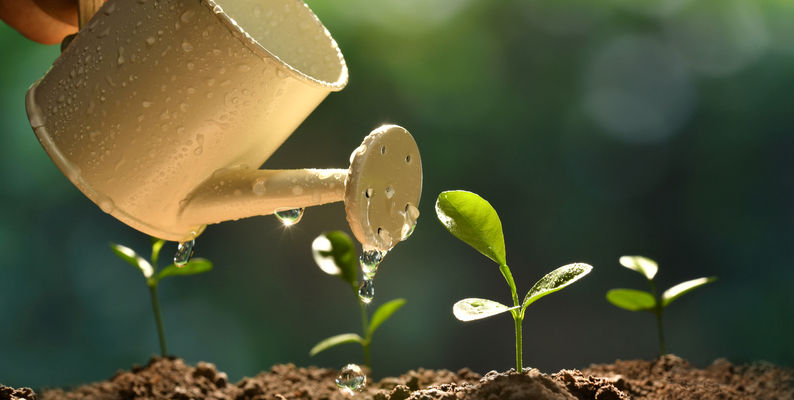

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('plant_growth_data.csv')

In [4]:
df.head()

Soil_Type  Sunlight_Hours Water_Frequency Fertilizer_Type  Temperature  \
0      loam        5.192294       bi-weekly        chemical    31.719602   
1     sandy        4.033133          weekly         organic    28.919484   
2      loam        8.892769       bi-weekly            none    23.179059   
3      loam        8.241144       bi-weekly            none    18.465886   
4     sandy        8.374043       bi-weekly         organic    18.128741   

    Humidity  Growth_Milestone  
0  61.591861                 0  
1  52.422276                 1  
2  44.660539                 0  
3  46.433227                 0  
4  63.625923                 0

In [5]:
df.tail()

Soil_Type  Sunlight_Hours Water_Frequency Fertilizer_Type  Temperature  \
188     sandy           5.652           daily            none         28.0   
189      clay           7.528          weekly        chemical         30.5   
190      loam           4.934       bi-weekly            none         24.5   
191     sandy           8.273           daily         organic         27.9   
192      clay           6.732          weekly            none         21.7   

     Humidity  Growth_Milestone  
188      70.2                 0  
189      60.1                 1  
190      61.7                 0  
191      69.5                 1  
192      56.9                 0

In [6]:
df.shape

(193, 7)

In [7]:
df.columns

Index(['Soil_Type', 'Sunlight_Hours', 'Water_Frequency', 'Fertilizer_Type',
       'Temperature', 'Humidity', 'Growth_Milestone'],
      dtype='object')

**Plant Growth Data Classification**

**Dataset Overview**

The "Plant Growth Data Classification" dataset is designed for predicting plant growth stages or milestones based on various environmental and management factors. The task involves classifying the growth stage a plant reaches given input variables such as soil type, sunlight exposure, water frequency, fertilizer type, temperature, and humidity. The insights from this prediction can aid in optimizing agricultural practices and improving greenhouse management by understanding how different conditions affect plant growth.

**Features Description**
1. **Soil_Type**: The type or composition of soil where the plants are cultivated.
2. **Sunlight_Hours**: The amount or intensity of sunlight the plants receive.
3. **Water_Frequency**: The frequency at which the plants are watered.
4. **Fertilizer_Type**: The kind of fertilizer applied to support plant nutrition.
5. **Temperature**: The ambient temperature under which the plants are growing.
6. **Humidity**: The moisture levels in the surrounding environment.
7. **Growth_Milestone**: The growth stage or milestone achieved by the plant.

This dataset offers a practical tool for analyzing how different environmental conditions influence plant development.

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [11]:
df.describe()

Sunlight_Hours  Temperature    Humidity  Growth_Milestone
count      193.000000   193.000000  193.000000        193.000000
mean         6.826484    25.076087   58.098927          0.497409
std          1.599509     5.354170   12.631799          0.501294
min          4.033133    15.200000   30.567682          0.000000
25%          5.477000    20.637096   49.300000          0.000000
50%          6.833290    25.912336   59.182806          0.000000
75%          8.241144    29.757938   69.100000          1.000000
max          9.913903    34.810103   79.648240          1.000000

In [12]:
df.nunique()

Soil_Type             3
Sunlight_Hours      190
Water_Frequency       3
Fertilizer_Type       3
Temperature         189
Humidity            191
Growth_Milestone      2
dtype: int64

In [13]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['Soil_Type', 'Water_Frequency', 'Fertilizer_Type'], dtype='object')

Numerical type columns:
Index(['Sunlight_Hours', 'Temperature', 'Humidity', 'Growth_Milestone'], dtype='object')


In [14]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [15]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [16]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']
Non-Categorical Features: []
Discrete Features: ['Growth_Milestone']
Continuous Features: ['Sunlight_Hours', 'Temperature', 'Humidity']


In [17]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

Soil_Type
['loam' 'sandy' 'clay']

Water_Frequency
['bi-weekly' 'weekly' 'daily']

Fertilizer_Type
['chemical' 'organic' 'none']



In [18]:
for i in categorical:
    print(df[i].value_counts())
    print()

Soil_Type
clay     67
sandy    64
loam     62
Name: count, dtype: int64

Water_Frequency
daily        74
bi-weekly    60
weekly       59
Name: count, dtype: int64

Fertilizer_Type
none        74
chemical    65
organic     54
Name: count, dtype: int64



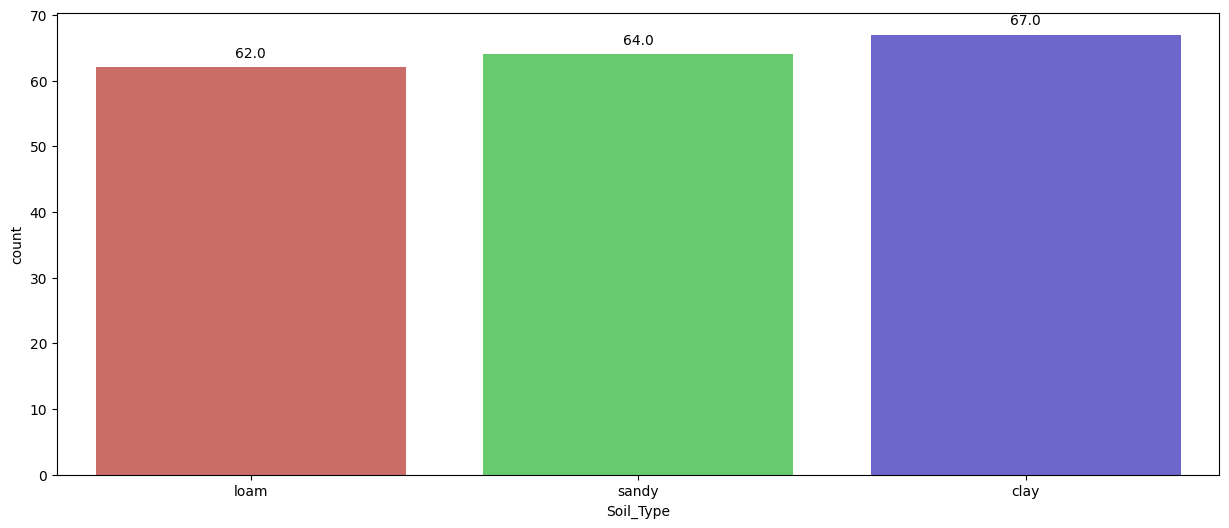

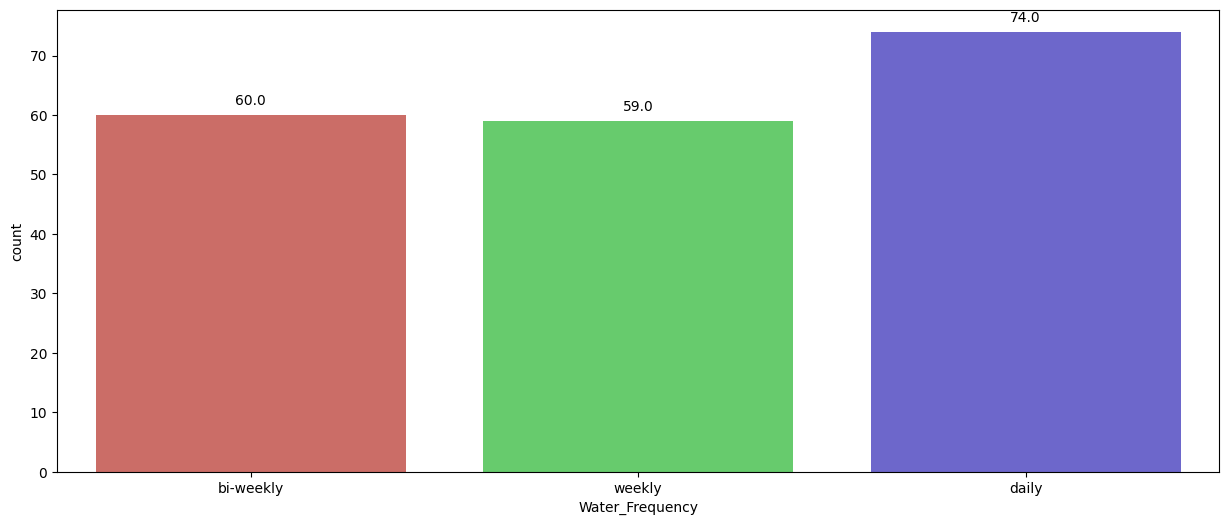

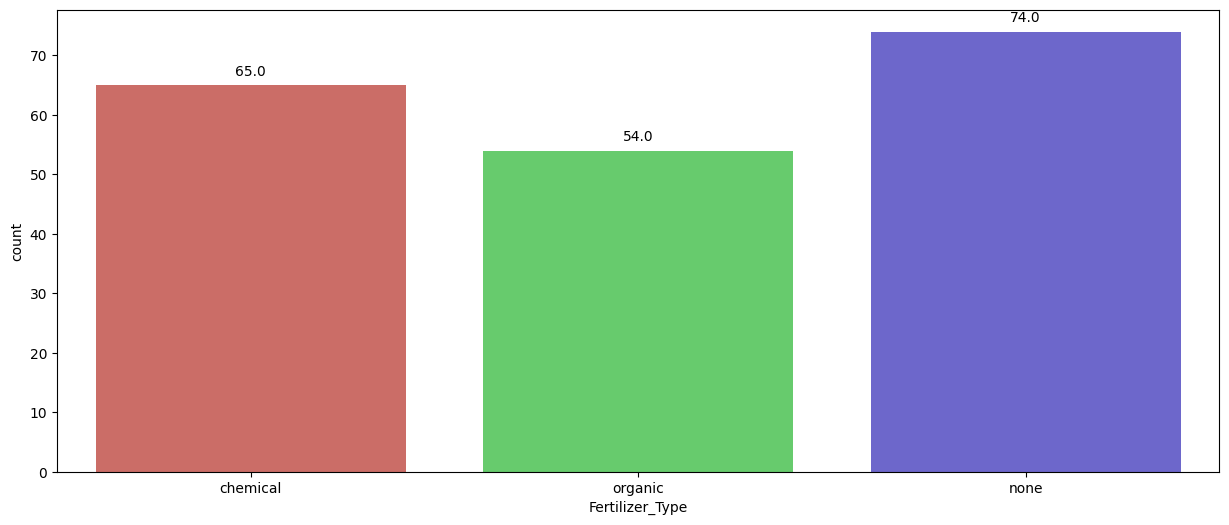

In [19]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

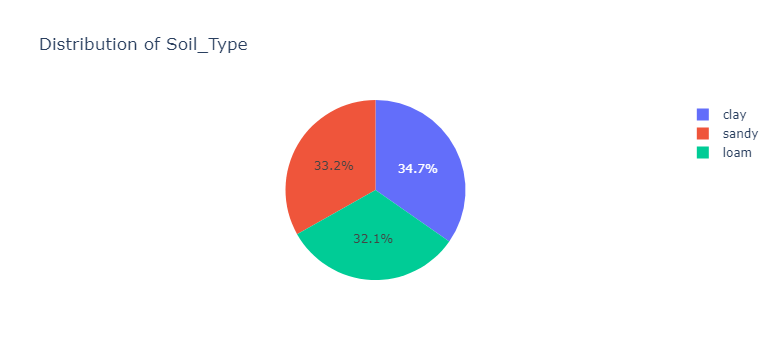

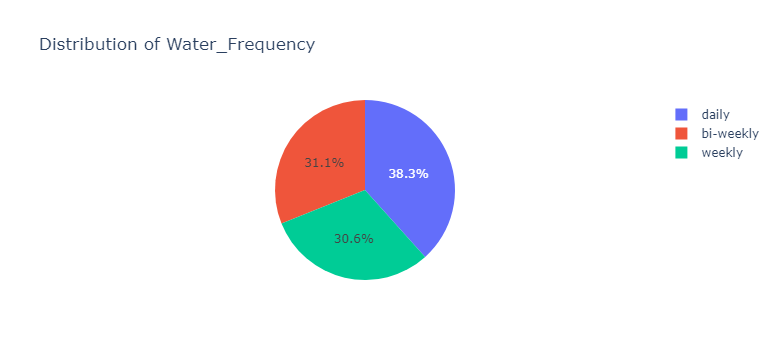

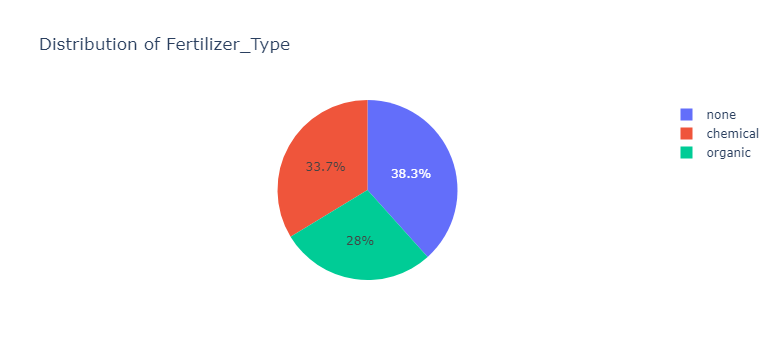

In [20]:
import plotly.express as px

for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

In [21]:
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

Growth_Milestone
[0 1]



In [22]:
for i in discrete:
    print(df[i].value_counts())
    print()

Growth_Milestone
0    97
1    96
Name: count, dtype: int64



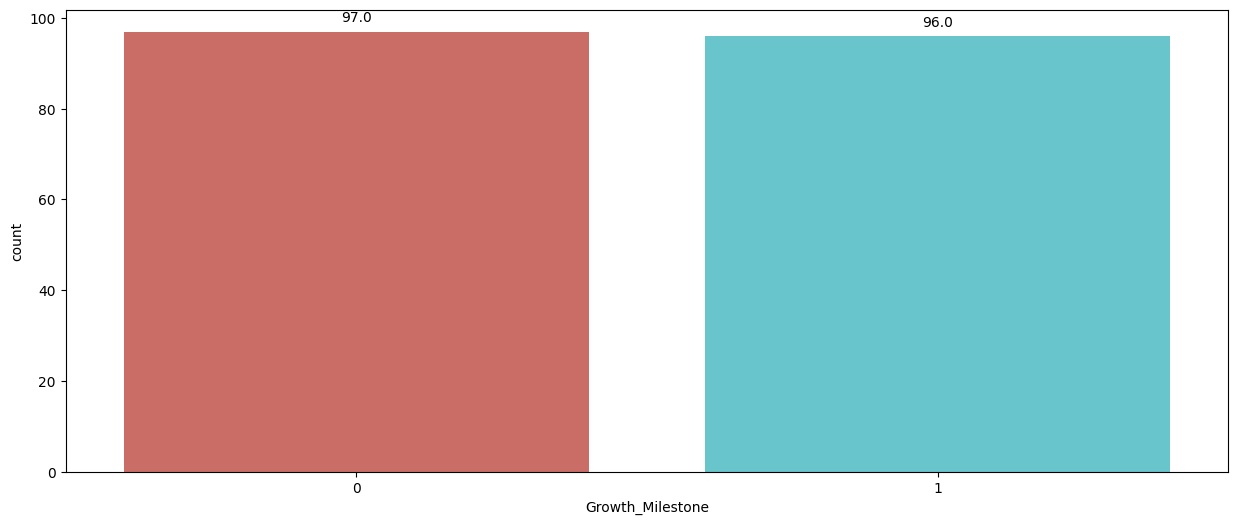

In [23]:
for i in discrete:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

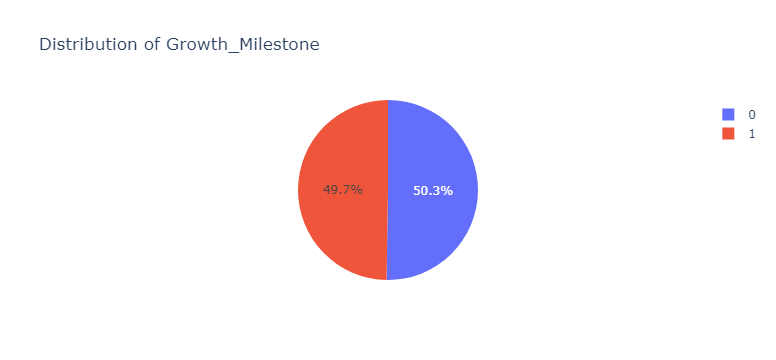

In [24]:
for i in discrete:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

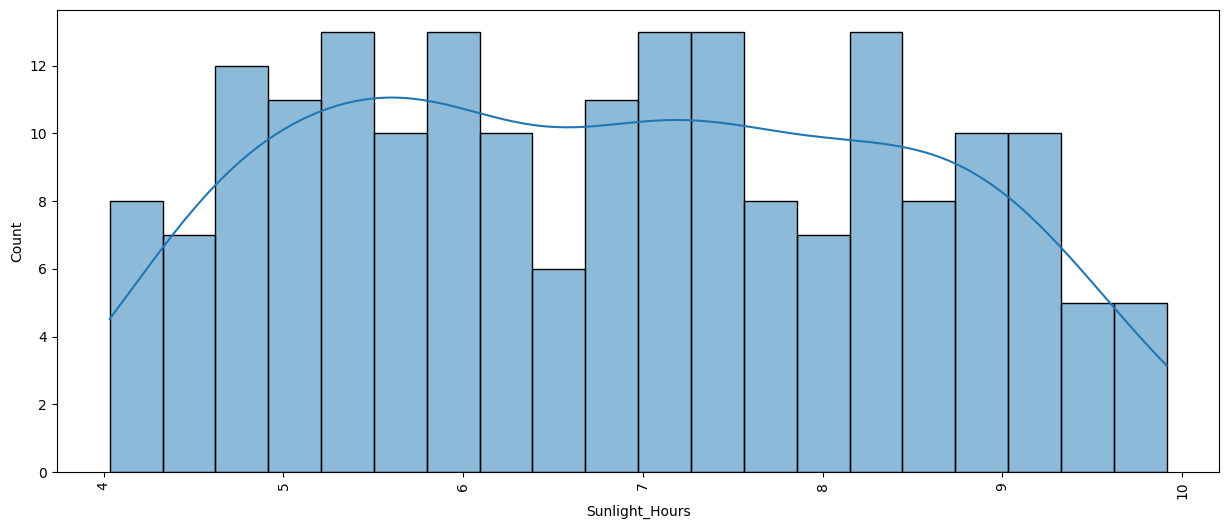

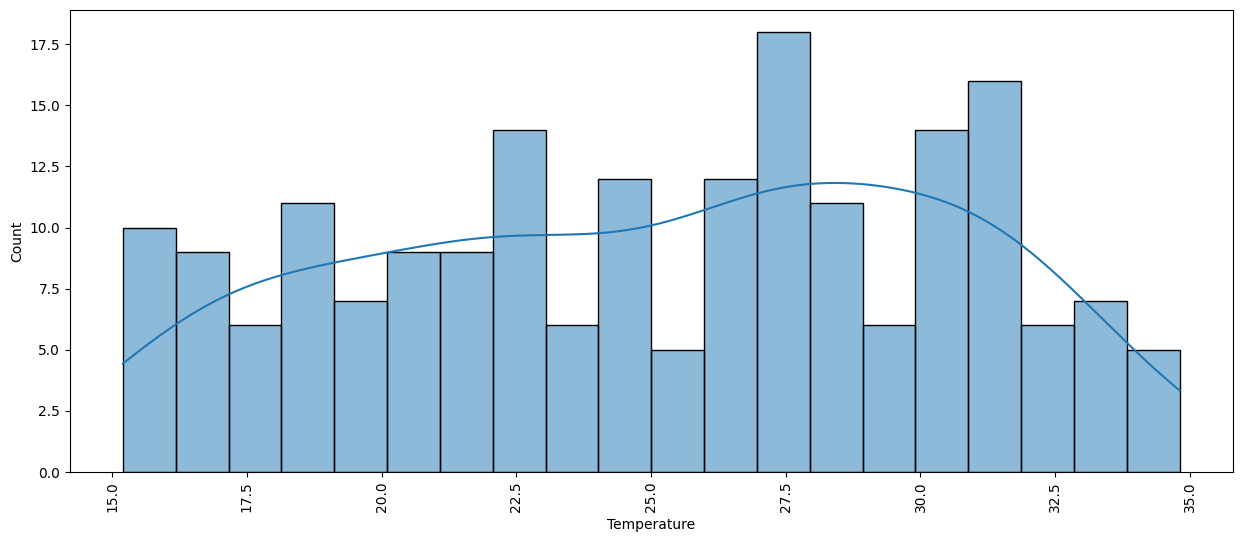

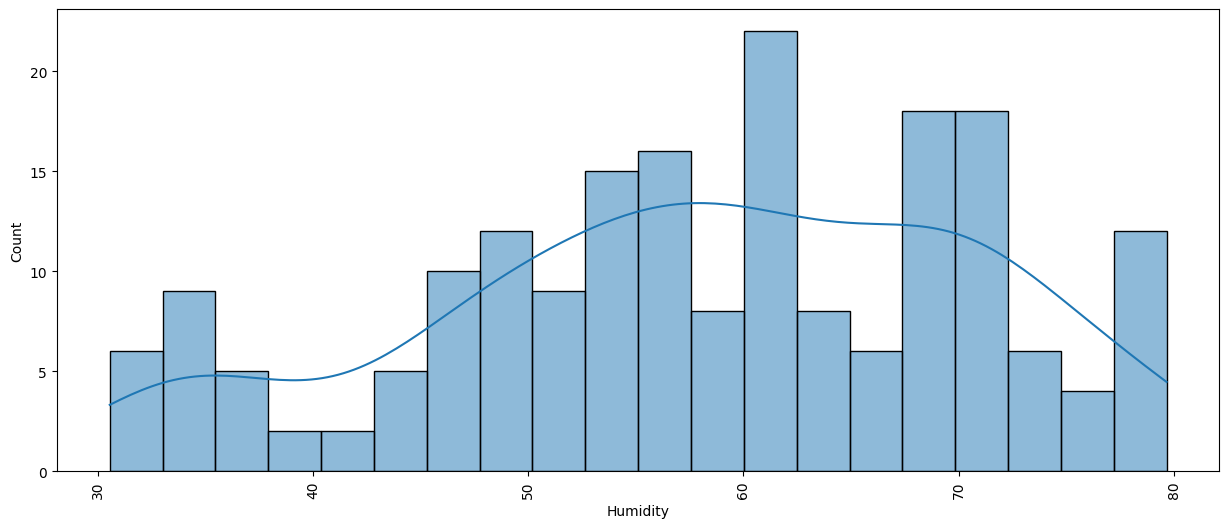

In [25]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

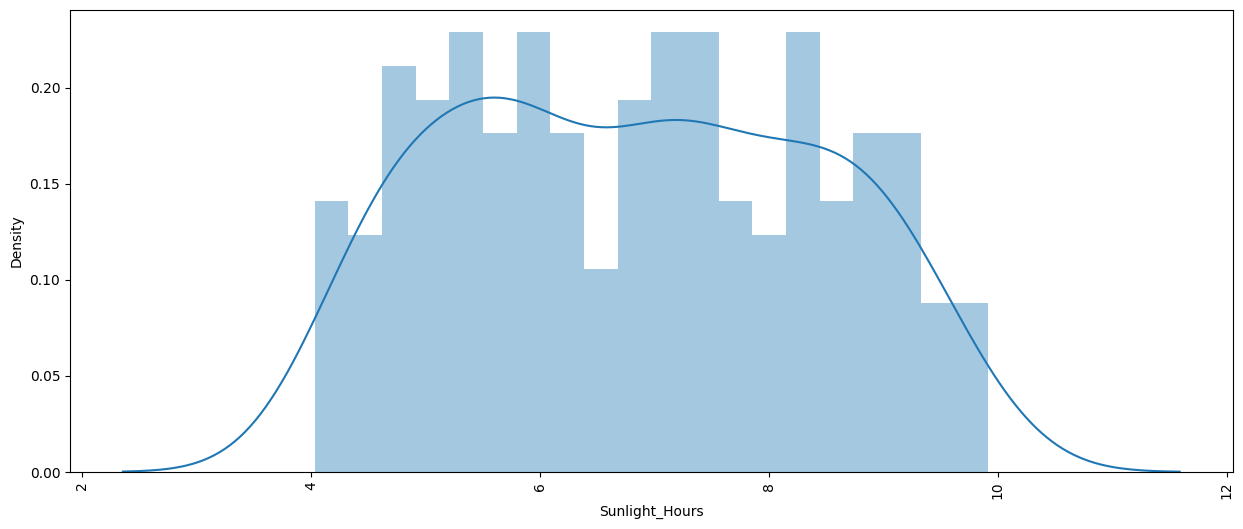

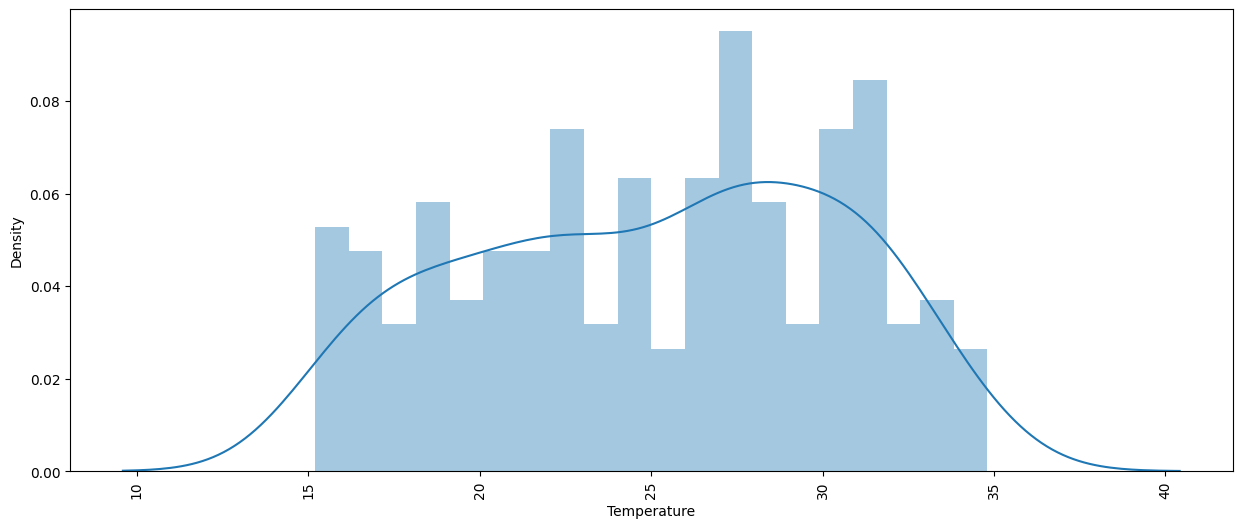

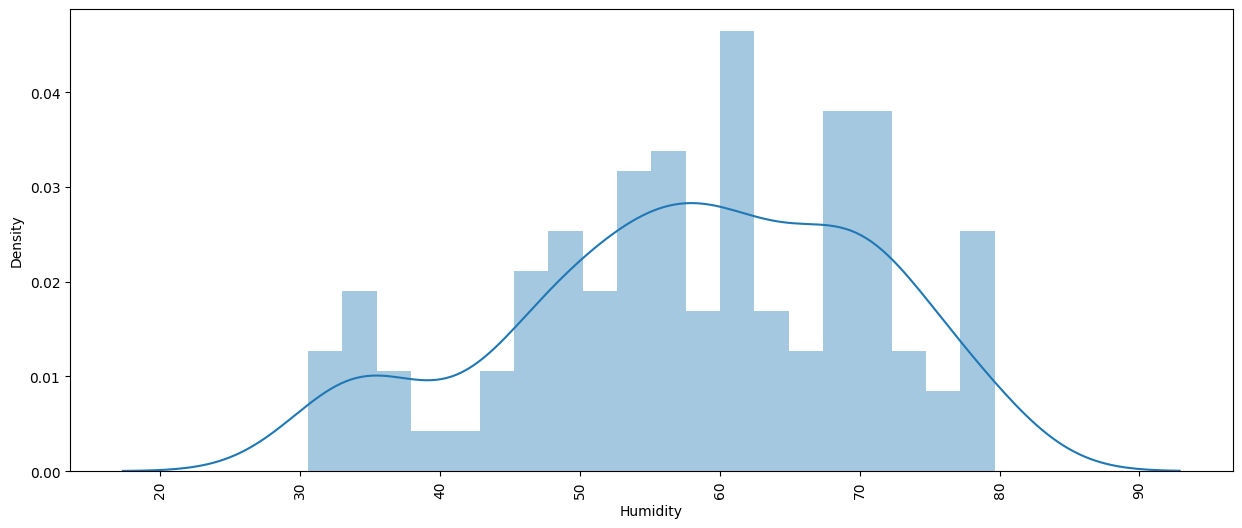

In [26]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

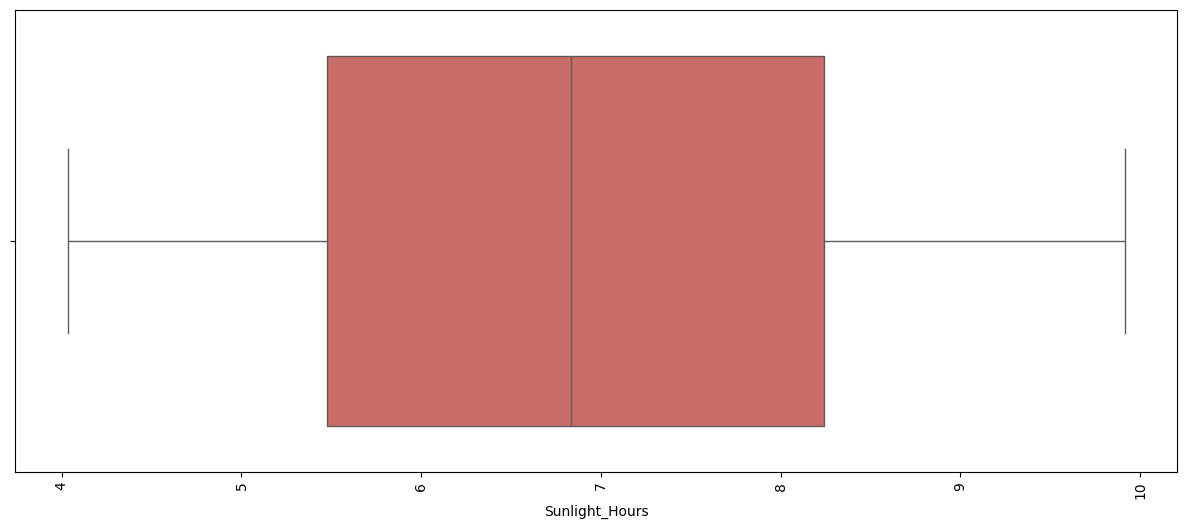

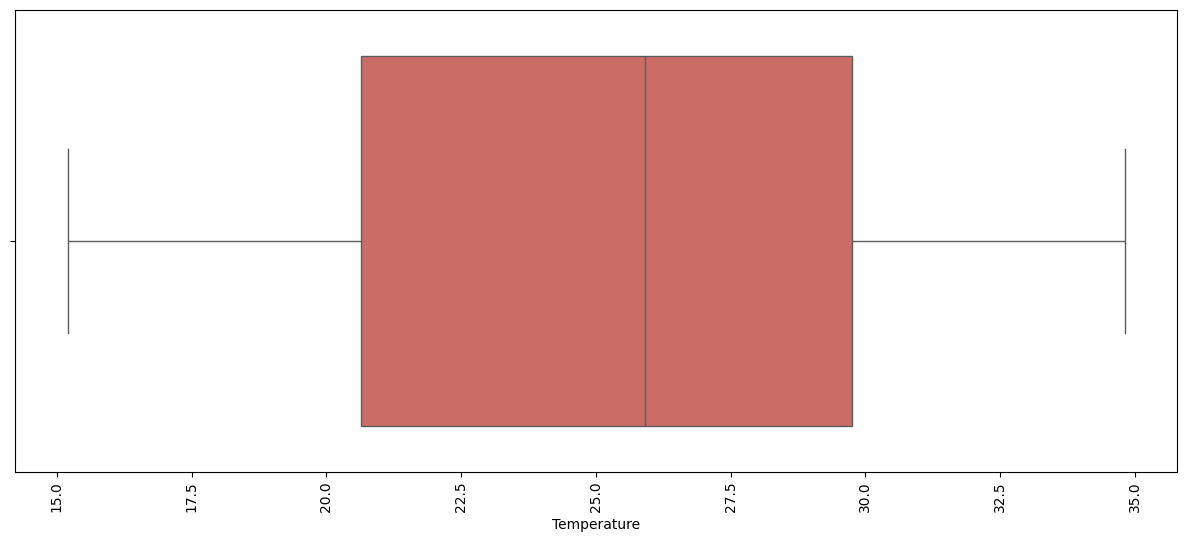

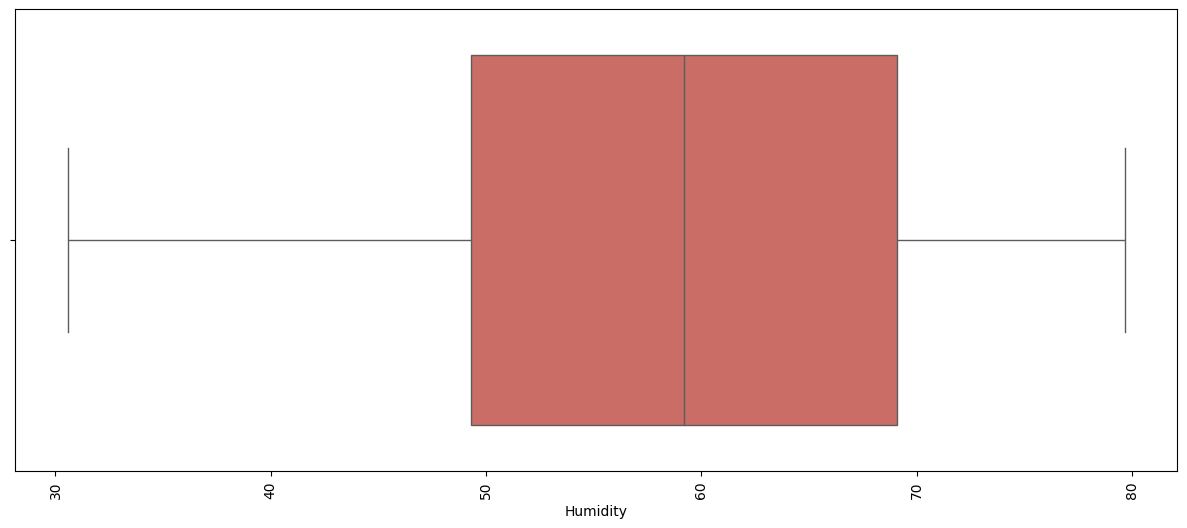

In [27]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

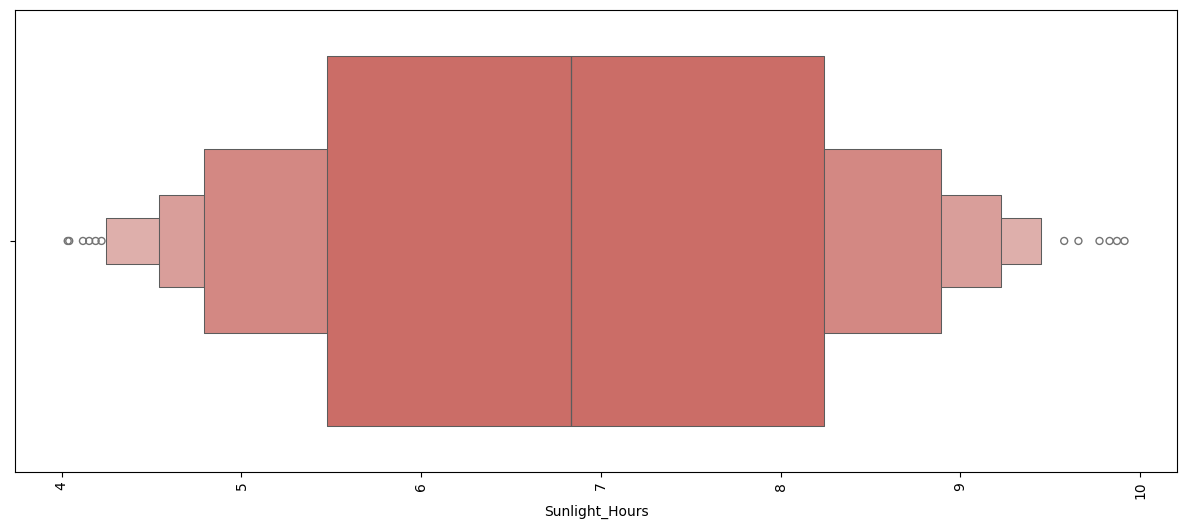

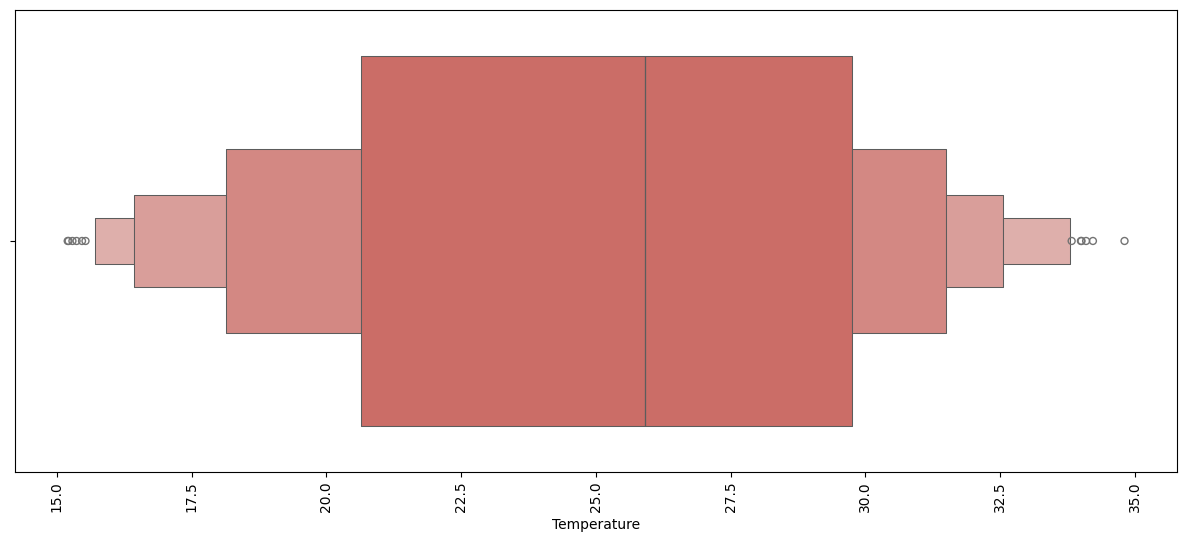

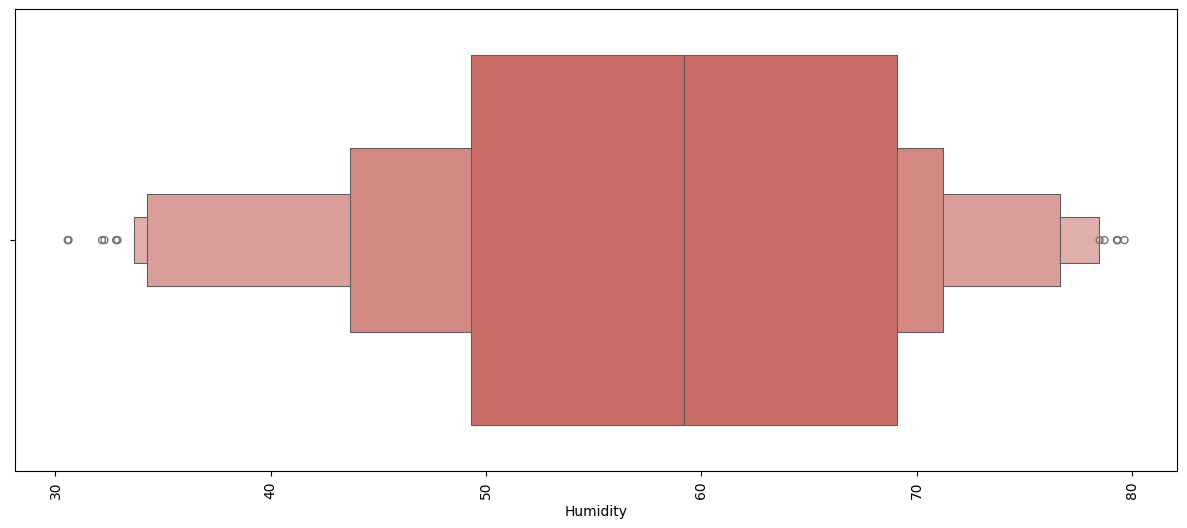

In [28]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

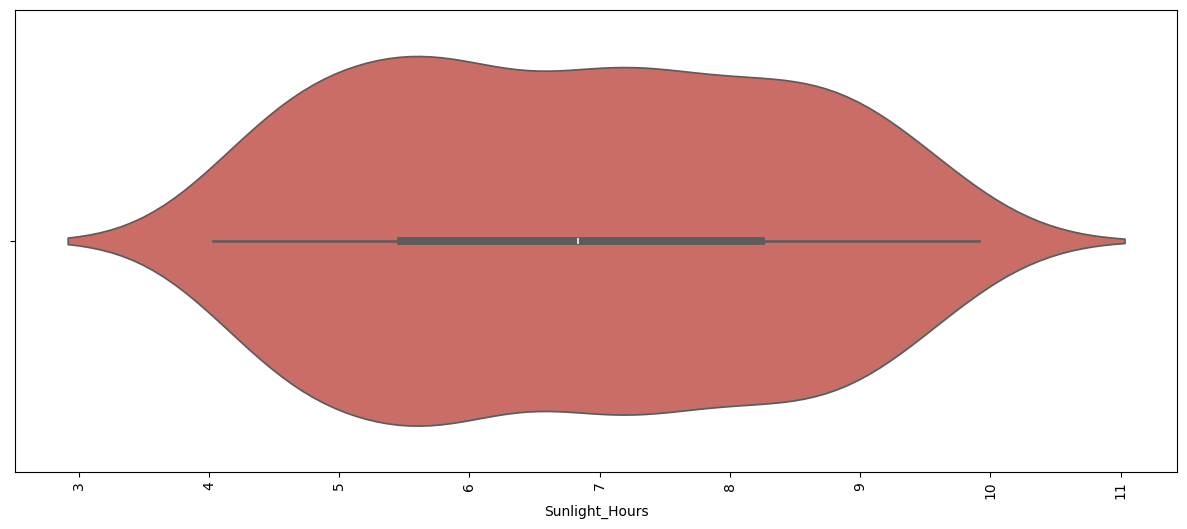

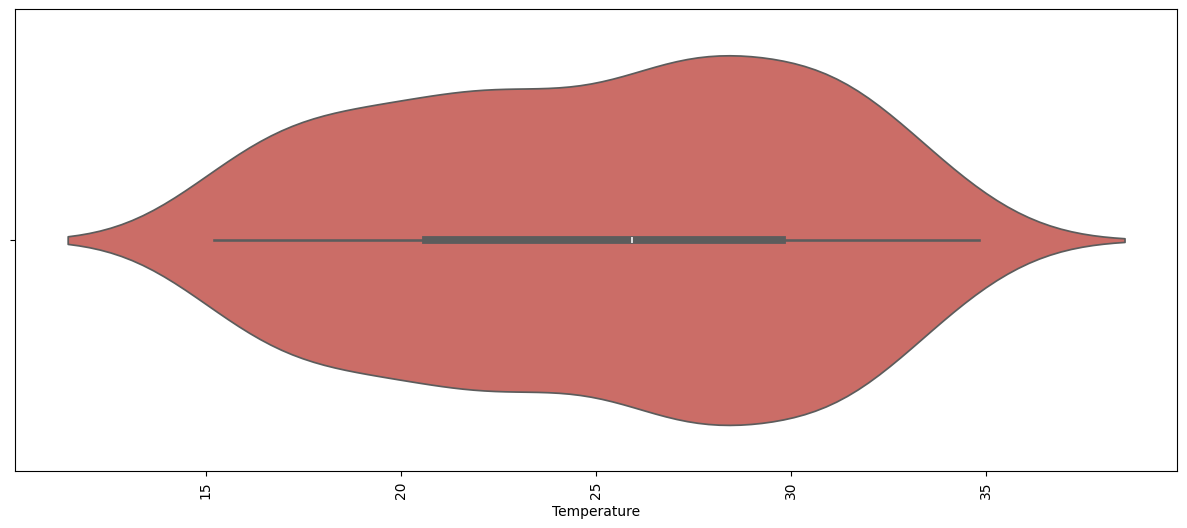

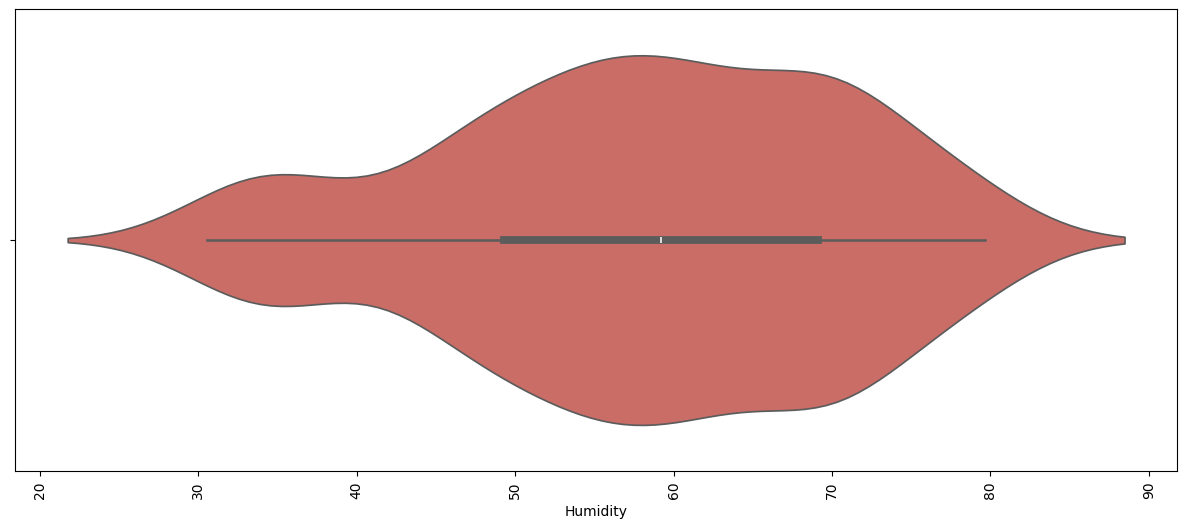

In [29]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

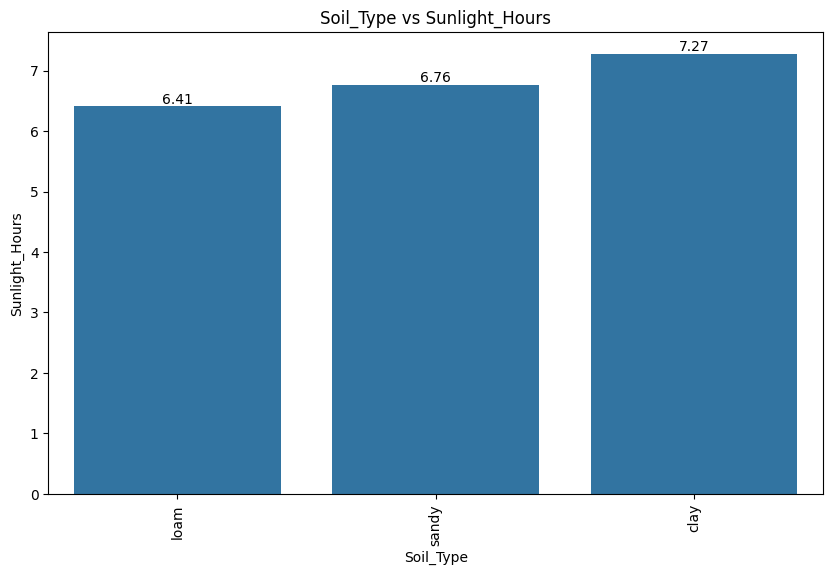

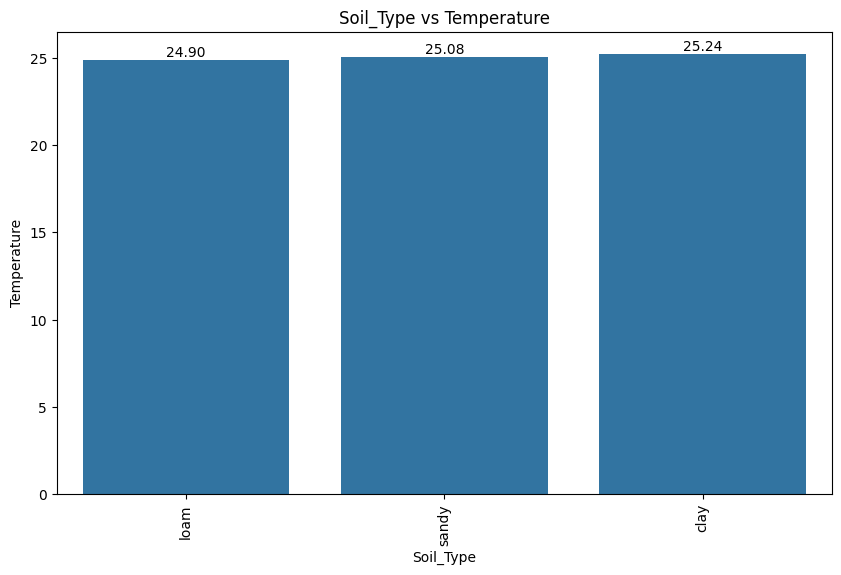

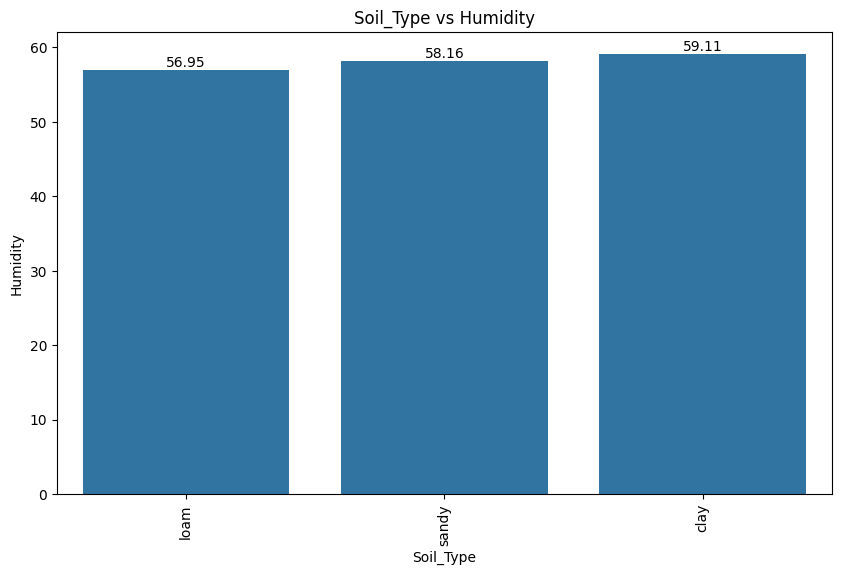

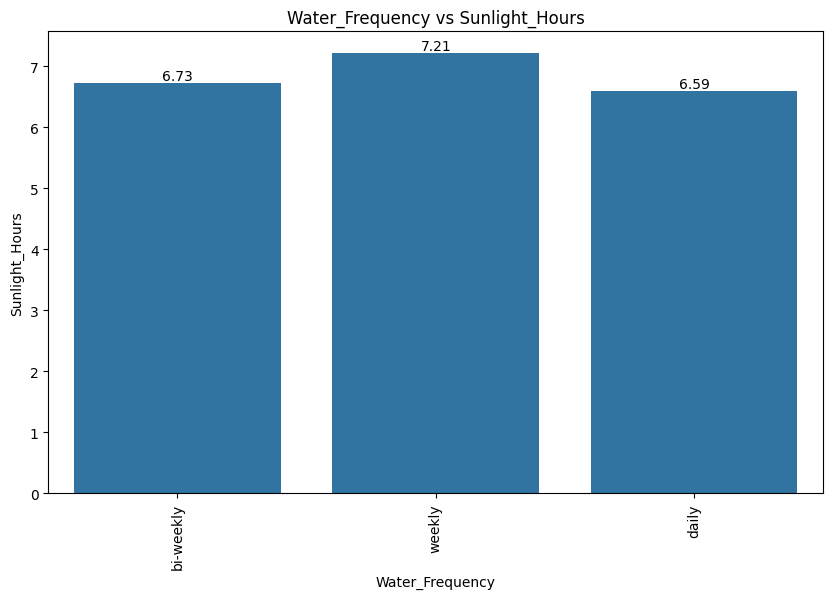

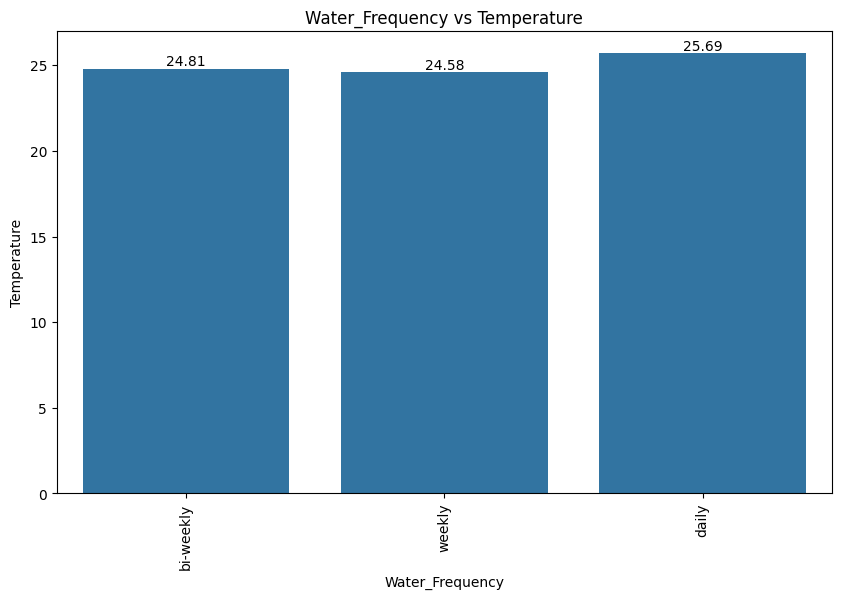

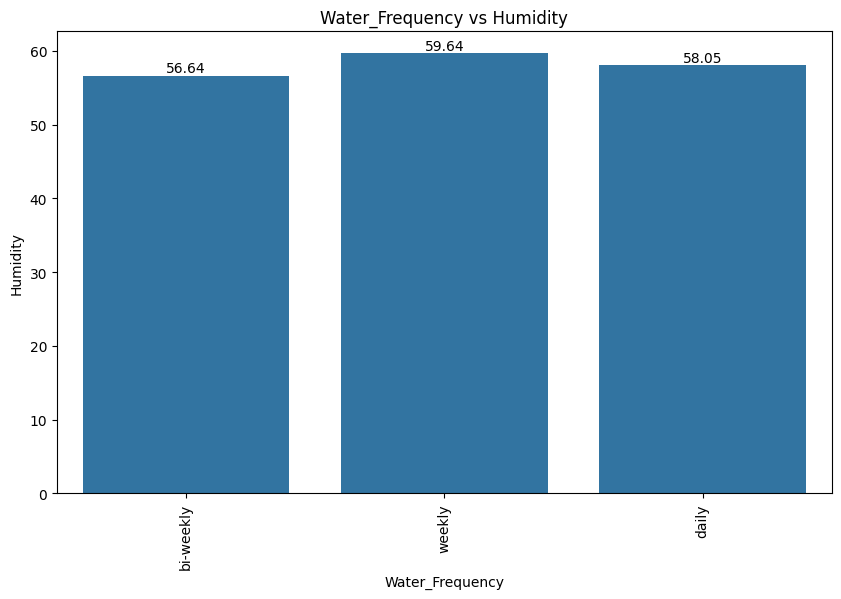

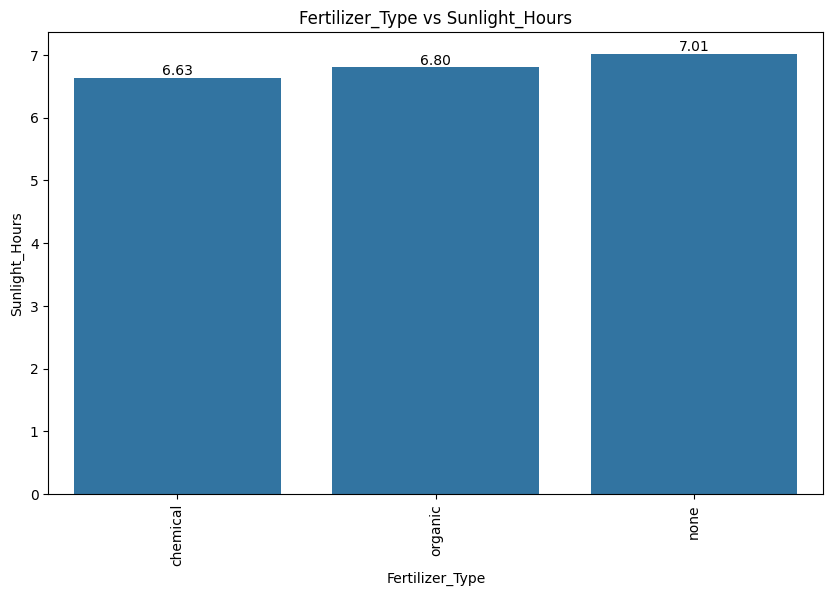

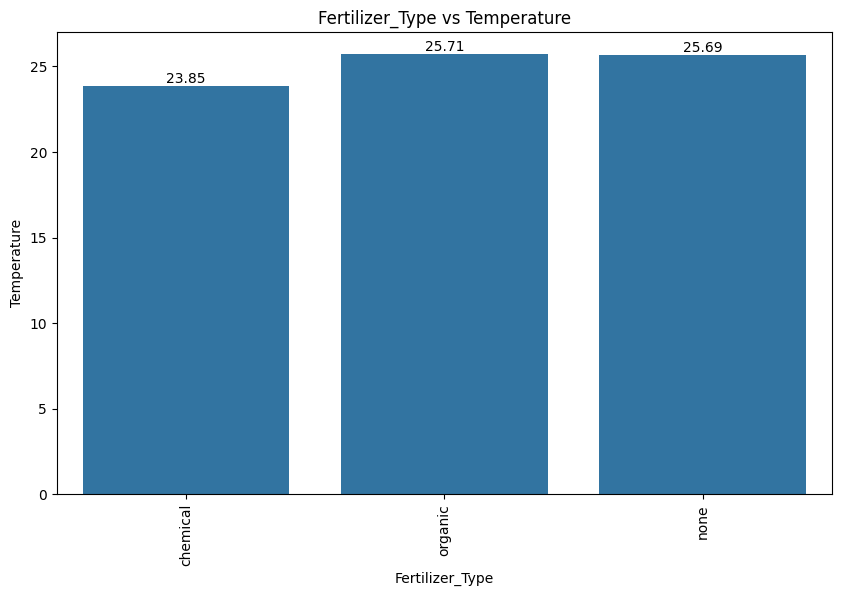

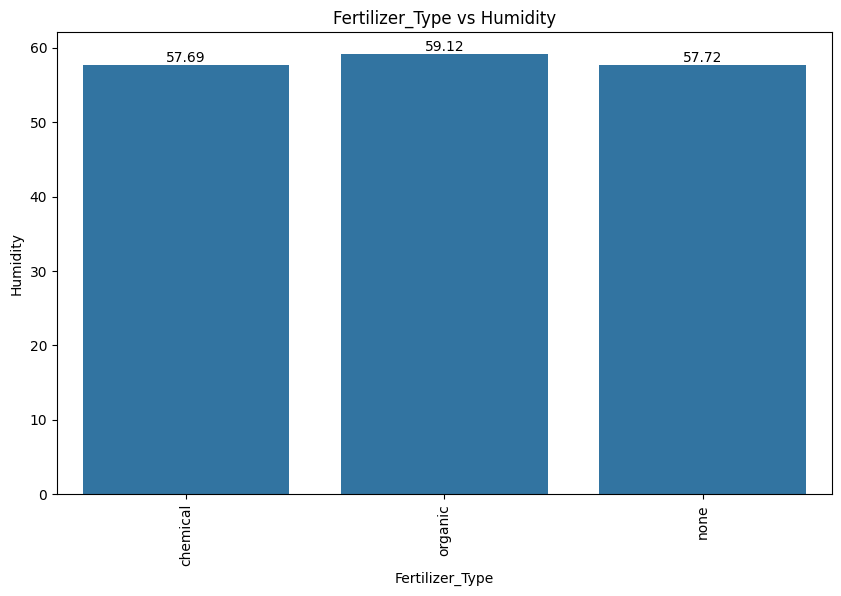

In [30]:
for dis in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=dis, y=cont, ci=None)
        plt.title(f'{dis} vs {cont}')
        
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()

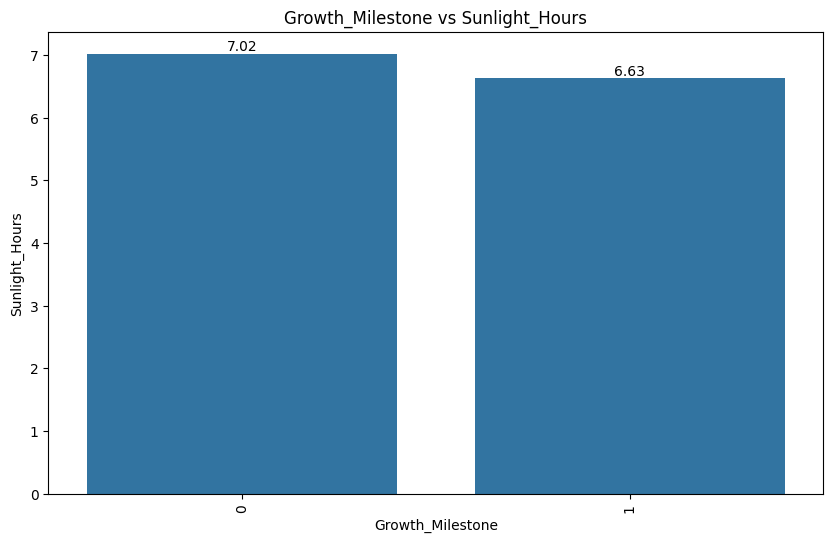

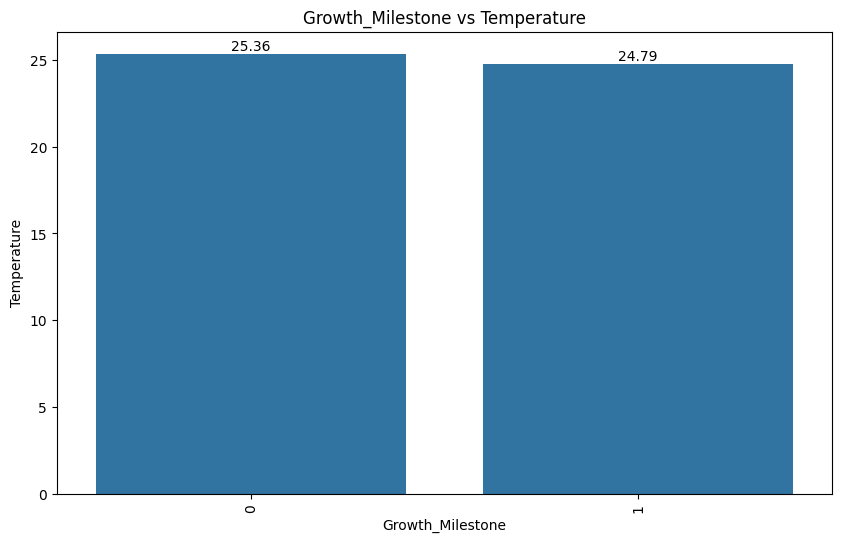

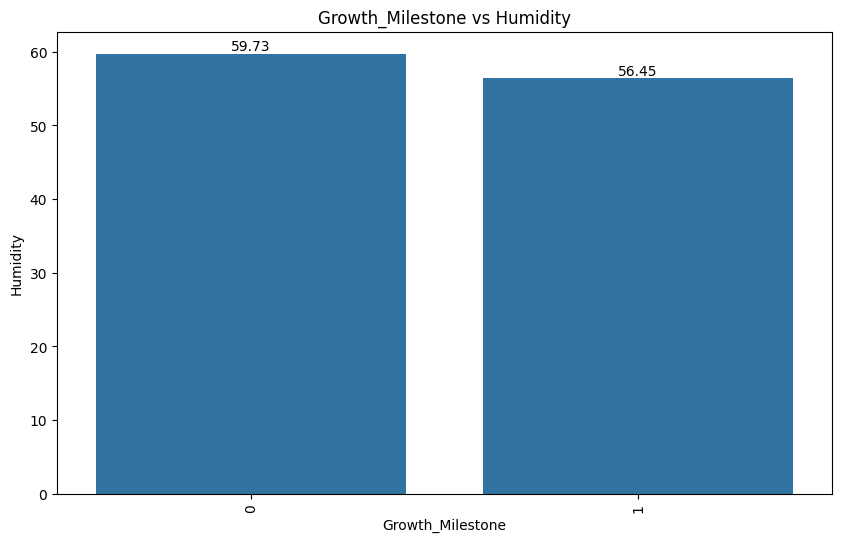

In [31]:
for dis in discrete:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=dis, y=cont, ci=None)
        plt.title(f'{dis} vs {cont}')
        
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()

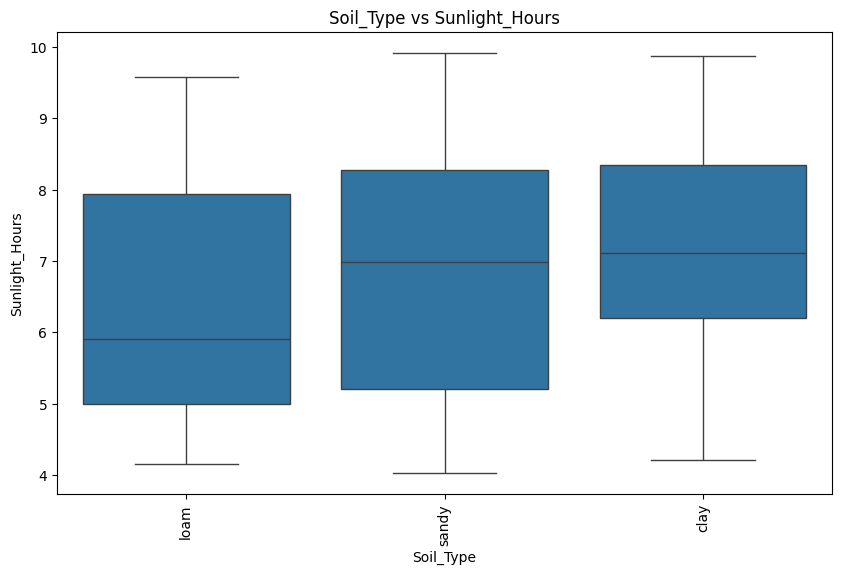

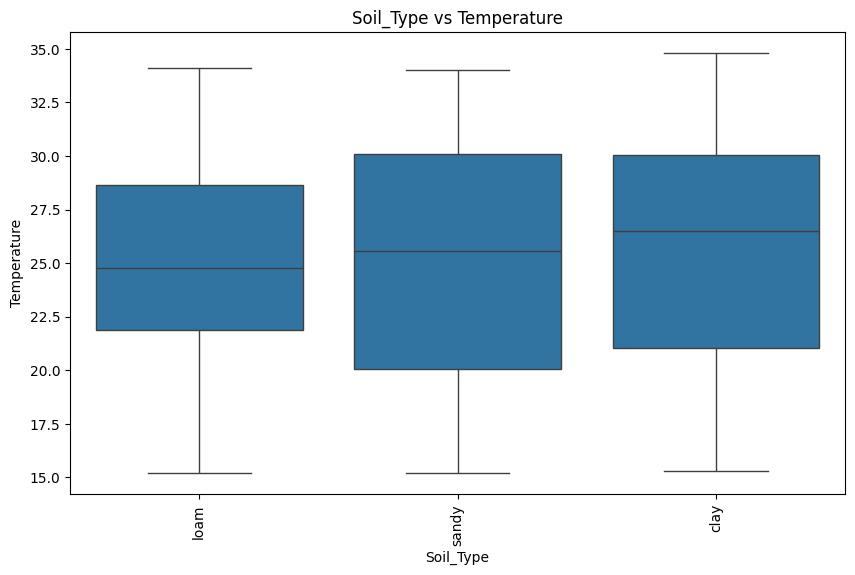

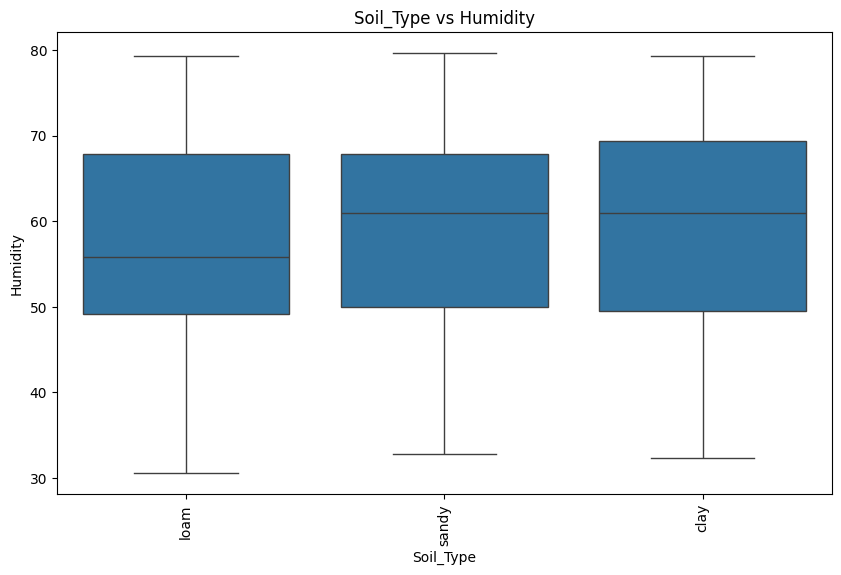

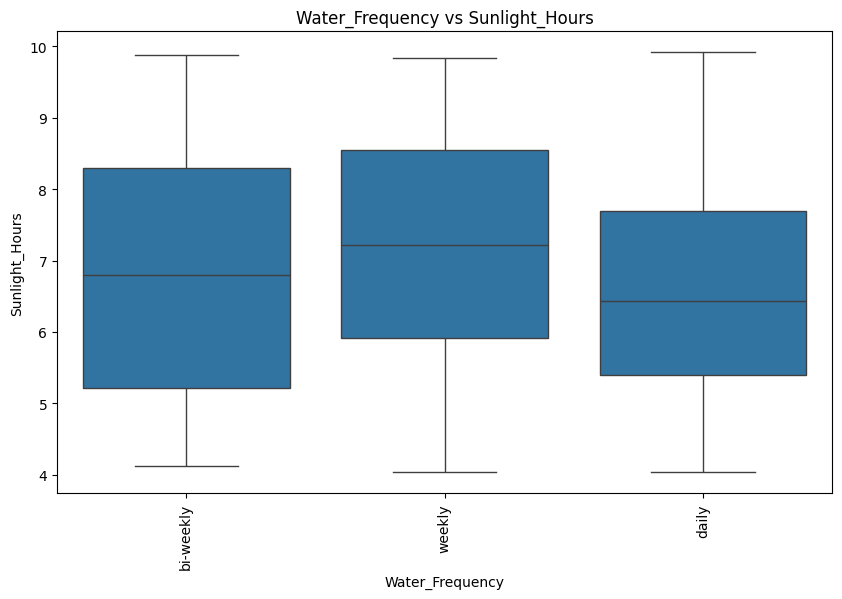

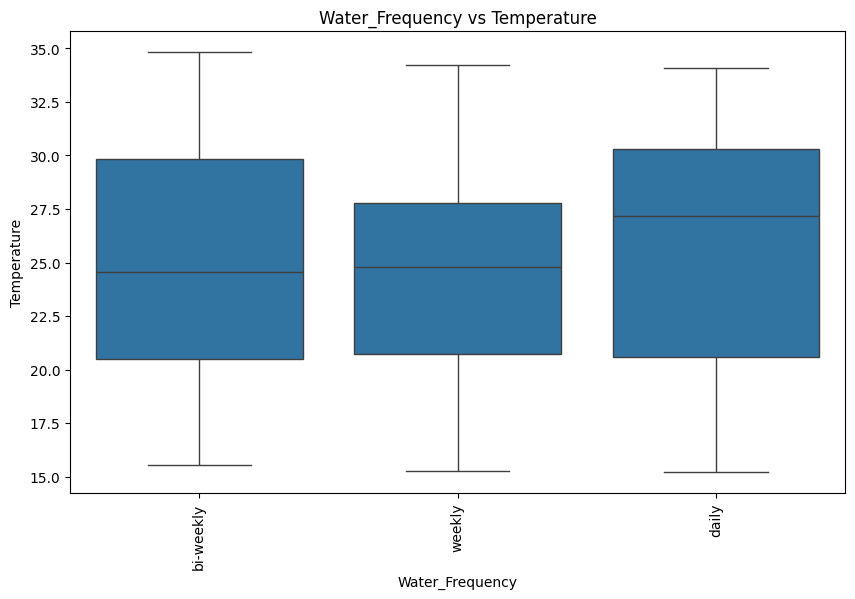

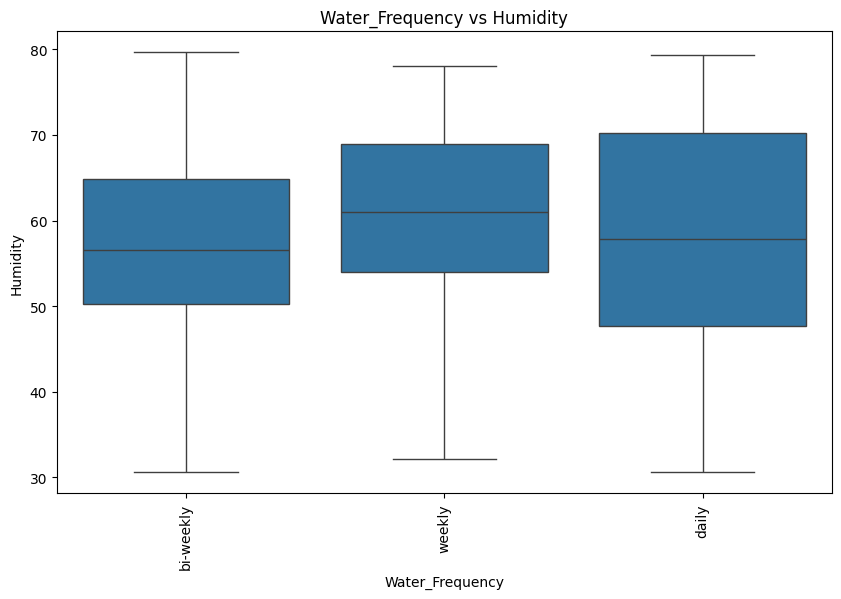

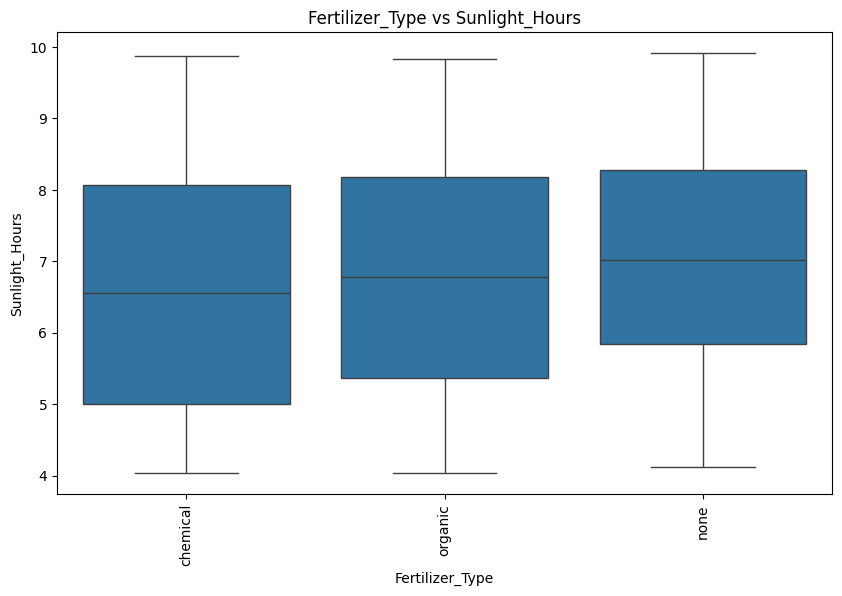

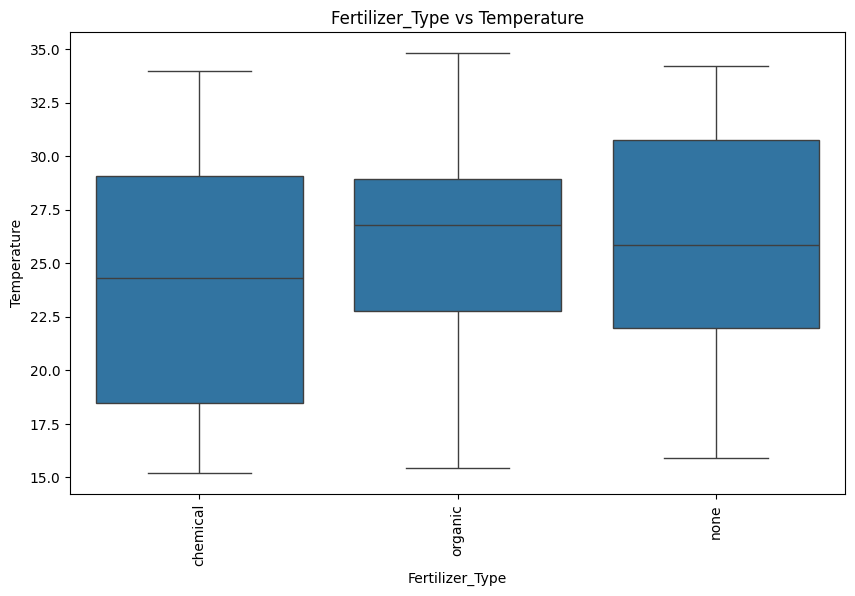

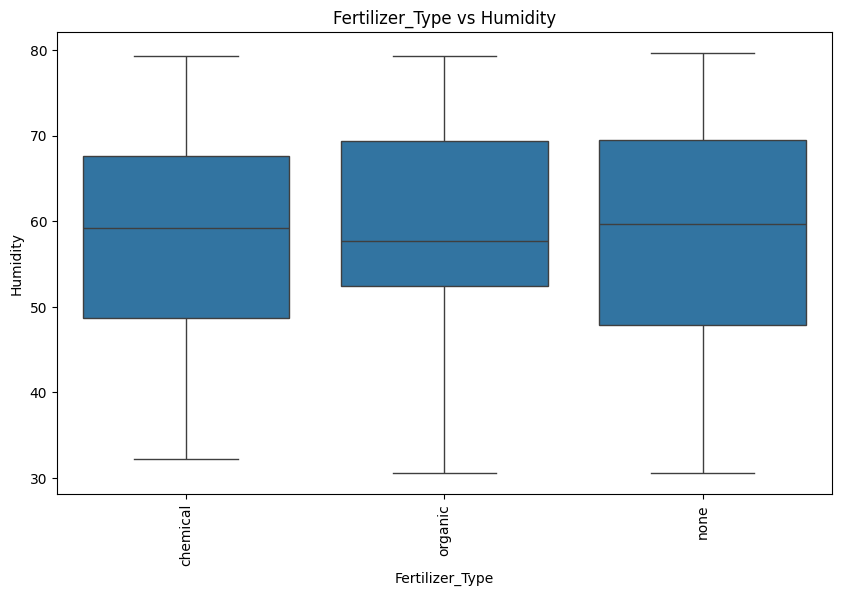

In [32]:
for dis in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.boxplot(data=df, x=dis, y=cont)
        plt.title(f'{dis} vs {cont}')
        plt.xticks(rotation = 90)
        plt.show()

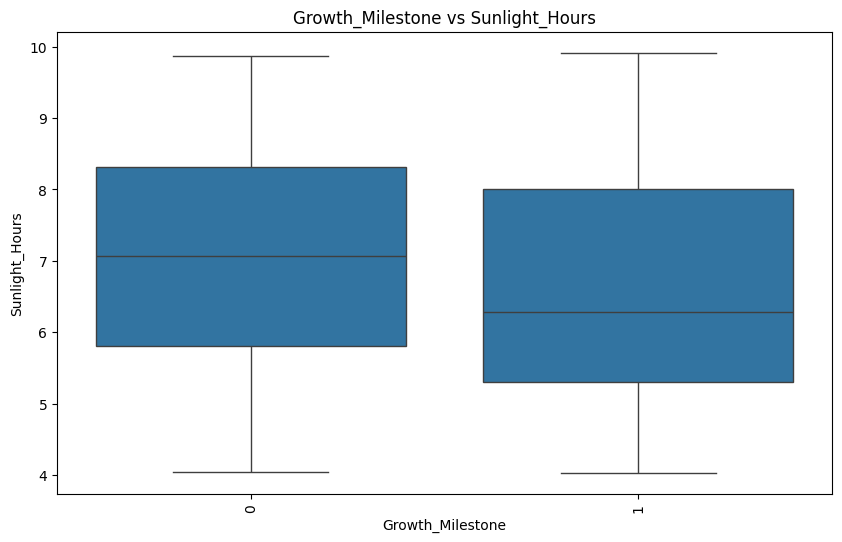

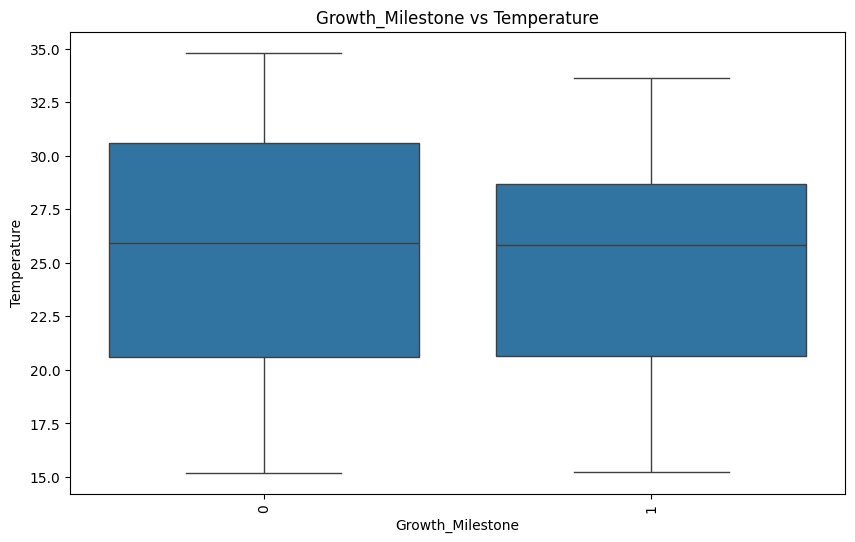

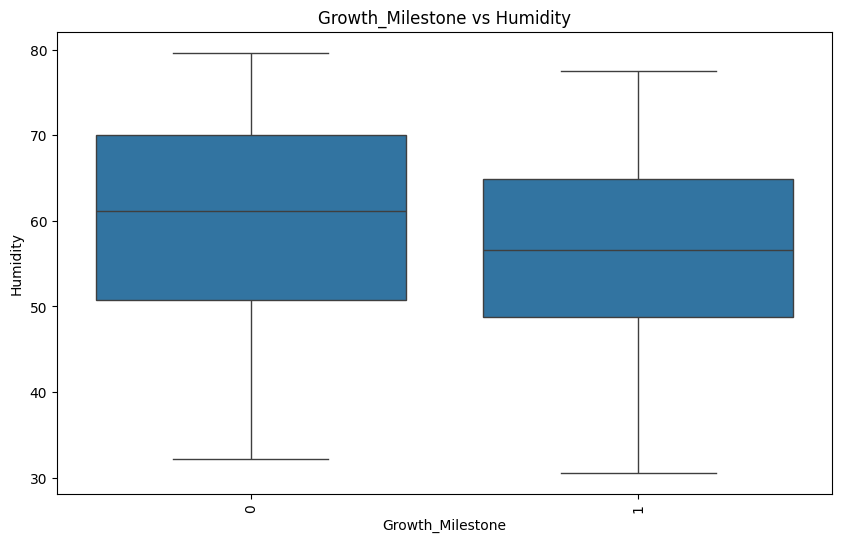

In [33]:
for dis in discrete:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.boxplot(data=df, x=dis, y=cont)
        plt.title(f'{dis} vs {cont}')
        plt.xticks(rotation = 90)
        plt.show()

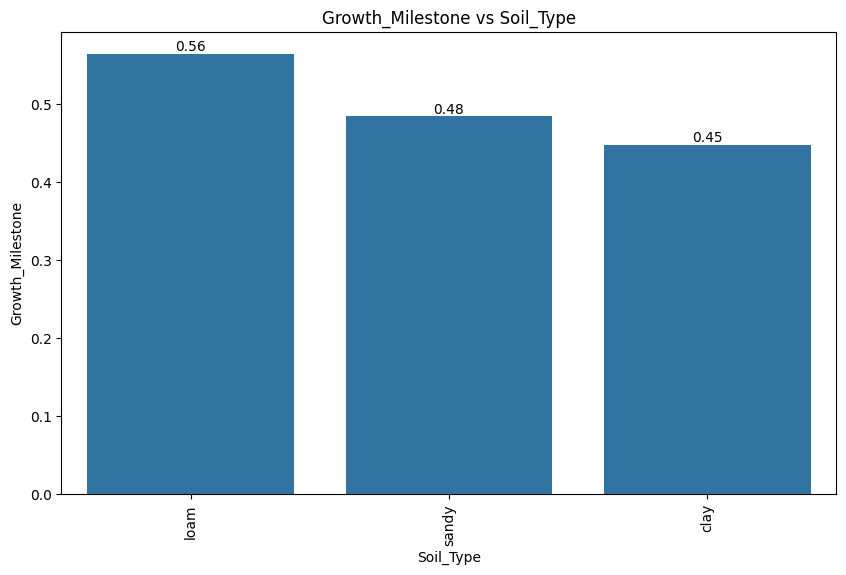

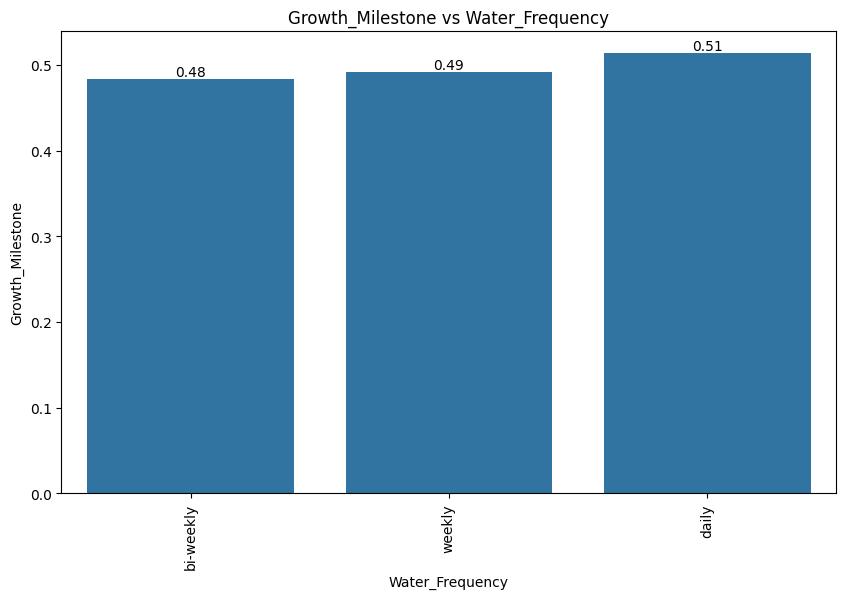

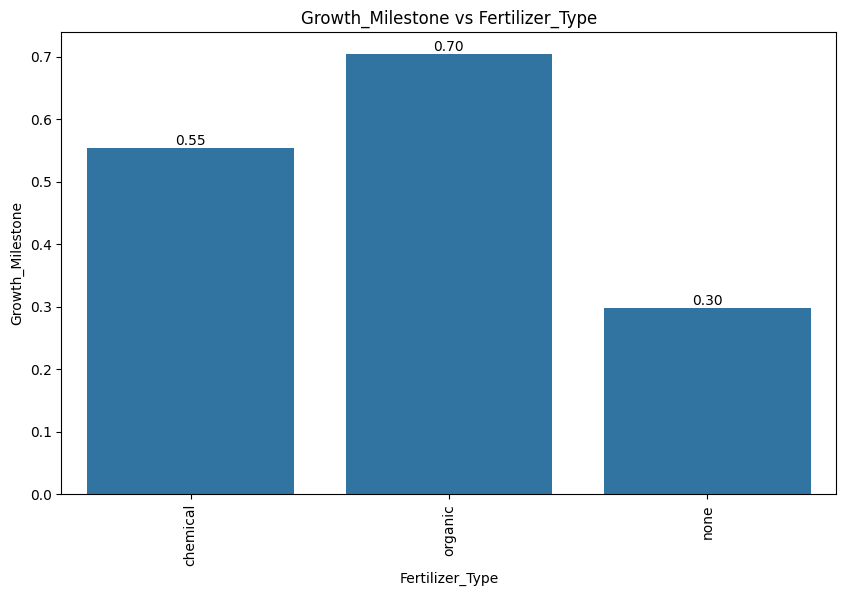

In [34]:
for dis in discrete:
    for cont in categorical:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, y=dis, x=cont, ci=None)
        plt.title(f'{dis} vs {cont}')
        
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()

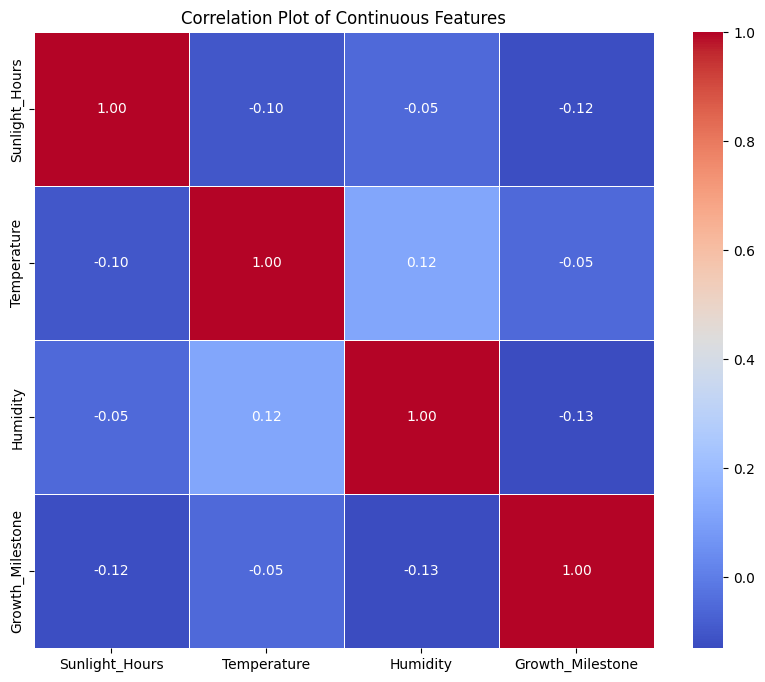

In [35]:
corr_matrix = df[numerical_columns ].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()

In [36]:
corr_matrix

Sunlight_Hours  Temperature  Humidity  Growth_Milestone
Sunlight_Hours          1.000000    -0.100628 -0.052482         -0.122212
Temperature            -0.100628     1.000000  0.117648         -0.053577
Humidity               -0.052482     0.117648  1.000000         -0.130328
Growth_Milestone       -0.122212    -0.053577 -0.130328          1.000000

In [37]:
pivot_table = pd.pivot_table(df, 
                             index=['Soil_Type', 'Water_Frequency', 'Fertilizer_Type'], 
                             values=['Growth_Milestone', 'Sunlight_Hours', 'Temperature', 'Humidity'], 
                             aggfunc='mean')

In [38]:
pivot_table

Growth_Milestone   Humidity  \
Soil_Type Water_Frequency Fertilizer_Type                                
clay      bi-weekly       chemical                 0.600000  57.586714   
                          none                     0.000000  60.794269   
                          organic                  0.600000  58.463685   
          daily           chemical                 0.400000  46.169012   
                          none                     0.500000  60.660795   
                          organic                  0.333333  61.026745   
          weekly          chemical                 0.600000  57.642384   
                          none                     0.230769  62.944109   
                          organic                  0.571429  61.791463   
loam      bi-weekly       chemical                 0.571429  60.382341   
                          none                     0.357143  53.554789   
                          organic                  1.000000  47.406759   
          daily           chemical                 0.666667  65.944957   
                          none                     0.500000  53.780787   
                          organic                  0.625000  62.437317   
          weekly          chemical                 0.250000  63.893265   
                          none                     0.250000  52.456764   
                          organic                  0.833333  57.189532   
sandy     bi-weekly       chemical                 0.375000  59.773150   
                          none                     0.250000  57.968077   
                          organic                  0.000000  66.712961   
          daily           chemical                 0.600000  56.476475   
                          none                     0.200000  54.380645   
                          organic                  0.900000  61.524422   
          weekly          chemical                 0.800000  49.932230   
                          none                     0.285714  65.027428   
                          organic                  1.000000  59.419612   

                                           Sunlight_Hours  Temperature  
Soil_Type Water_Frequency Fertilizer_Type                               
clay      bi-weekly       chemical               7.245069    21.013197  
                          none                   6.995572    30.356085  
                          organic                6.901831    28.641938  
          daily           chemical               7.806607    27.103959  
                          none                   6.869766    25.932484  
                          organic                7.015748    24.235269  
          weekly          chemical               7.025937    21.726925  
                          none                   7.599902    27.028588  
                          organic                7.754583    27.116507  
loam      bi-weekly       chemical               5.953629    27.777145  
                          none                   7.030134    24.581510  
                          organic                6.013172    23.695585  
          daily           chemical               4.666358    24.747647  
                          none                   7.292593    24.931430  
                          organic                5.874609    25.895209  
          weekly          chemical               6.706500    23.991037  
                          none                   5.965091    21.682305  
                          organic                7.604696    25.193856  
sandy     bi-weekly       chemical               6.503829    26.114037  
                          none                   6.436071    22.126106  
                          organic                8.000522    21.014370  
          daily           chemical               6.329447    22.314834  
                          none                   6.773618    27.319880  
                          organic                6.828917    27.435126 

In [39]:
cross_table = pd.crosstab(df['Soil_Type'], df['Fertilizer_Type'])
cross_table

Fertilizer_Type  chemical  none  organic
Soil_Type                               
clay                   25    24       18
loam                   17    24       21
sandy                  23    26       15

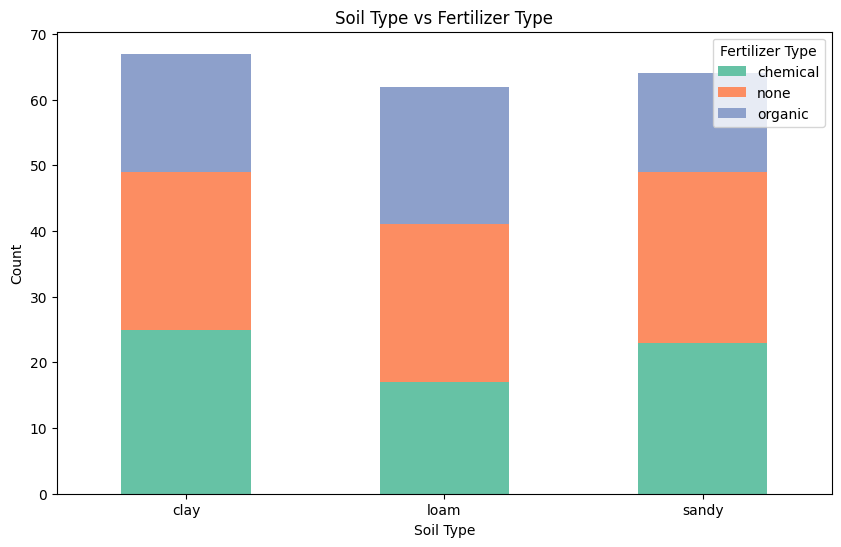

In [40]:
cross_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("Set2"))
plt.title('Soil Type vs Fertilizer Type')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Fertilizer Type')
plt.show()

In [41]:
cross_table2 = pd.crosstab(df['Soil_Type'], df['Water_Frequency'])
cross_table2

Water_Frequency  bi-weekly  daily  weekly
Soil_Type                                
clay                    18     19      30
loam                    28     20      14
sandy                   14     35      15

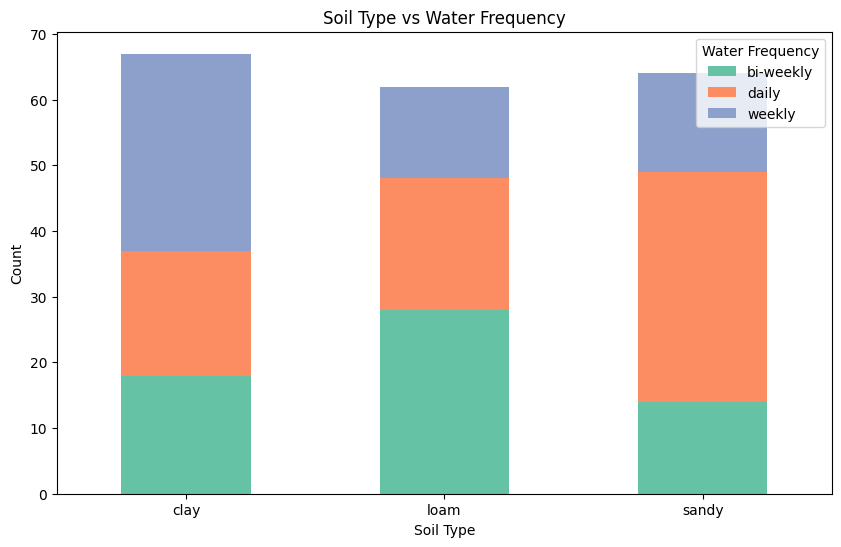

In [42]:
cross_table2.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("Set2"))
plt.title('Soil Type vs Water Frequency')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Water Frequency')
plt.show()

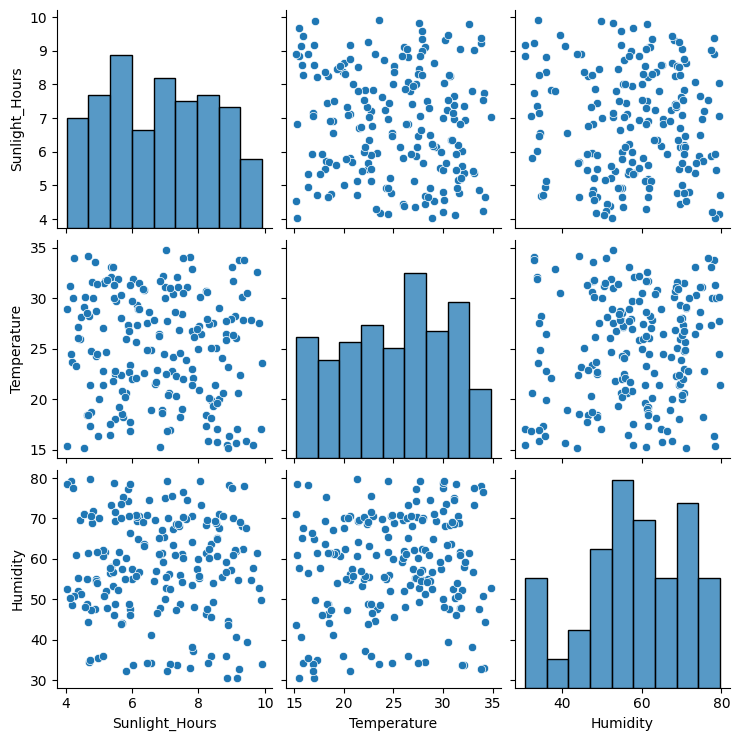

In [43]:
sns.pairplot(df, vars=['Sunlight_Hours', 'Temperature', 'Humidity'])
plt.show()

In [44]:
df['THI'] = df['Temperature'] - (0.55 * (1 - (df['Humidity'] / 100)) * (df['Temperature'] - 14.5))

In [45]:
df['Water_Adequacy'] = df['Water_Frequency'].apply(lambda x: 1 if x == 'Daily' else 0) / df['Temperature']

In [46]:
base_temp = 10  # Base temperature for plant growth
df['GDD'] = df['Temperature'].apply(lambda x: x - base_temp if x > base_temp else 0)

In [47]:
df['Fertilizer_Count'] = df.groupby('Fertilizer_Type')['Fertilizer_Type'].transform('count')

In [48]:
df['Stress_Index'] = ((df['Temperature'] > 30) | (df['Humidity'] < 40)).astype(int)

In [49]:
df

Soil_Type  Sunlight_Hours Water_Frequency Fertilizer_Type  Temperature  \
0        loam        5.192294       bi-weekly        chemical    31.719602   
1       sandy        4.033133          weekly         organic    28.919484   
2        loam        8.892769       bi-weekly            none    23.179059   
3        loam        8.241144       bi-weekly            none    18.465886   
4       sandy        8.374043       bi-weekly         organic    18.128741   
..        ...             ...             ...             ...          ...   
188     sandy        5.652000           daily            none    28.000000   
189      clay        7.528000          weekly        chemical    30.500000   
190      loam        4.934000       bi-weekly            none    24.500000   
191     sandy        8.273000           daily         organic    27.900000   
192      clay        6.732000          weekly            none    21.700000   

      Humidity  Growth_Milestone        THI  Water_Adequacy        GDD  \
0    61.591861                 0  28.082052             0.0  21.719602   
1    52.422276                 1  25.146230             0.0  18.919484   
2    44.660539                 0  20.537439             0.0  13.179059   
3    46.433227                 0  17.297468             0.0   8.465886   
4    63.625923                 0  17.402784             0.0   8.128741   
..         ...               ...        ...             ...        ...   
188  70.200000                 0  25.787350             0.0  18.000000   
189  60.100000                 1  26.988800             0.0  20.500000   
190  61.700000                 0  22.393500             0.0  14.500000   
191  69.500000                 1  25.652150             0.0  17.900000   
192  56.900000                 0  19.993240             0.0  11.700000   

     Fertilizer_Count  Stress_Index  
0                  65             1  
1                  54             0  
2                  74             0  
3                  74             0  
4                  54             0  
..                ...           ...  
188                74             0  
189                65             1  
190                74             0  
191                54             0  
192                74             0  

[193 rows x 12 columns]

In [50]:
df_encoded = pd.get_dummies(df, columns=['Soil_Type', 'Water_Frequency', 'Fertilizer_Type'])

In [51]:
df_encoded

Sunlight_Hours  Temperature   Humidity  Growth_Milestone        THI  \
0          5.192294    31.719602  61.591861                 0  28.082052   
1          4.033133    28.919484  52.422276                 1  25.146230   
2          8.892769    23.179059  44.660539                 0  20.537439   
3          8.241144    18.465886  46.433227                 0  17.297468   
4          8.374043    18.128741  63.625923                 0  17.402784   
..              ...          ...        ...               ...        ...   
188        5.652000    28.000000  70.200000                 0  25.787350   
189        7.528000    30.500000  60.100000                 1  26.988800   
190        4.934000    24.500000  61.700000                 0  22.393500   
191        8.273000    27.900000  69.500000                 1  25.652150   
192        6.732000    21.700000  56.900000                 0  19.993240   

     Water_Adequacy        GDD  Fertilizer_Count  Stress_Index  \
0               0.0  21.719602                65             1   
1               0.0  18.919484                54             0   
2               0.0  13.179059                74             0   
3               0.0   8.465886                74             0   
4               0.0   8.128741                54             0   
..              ...        ...               ...           ...   
188             0.0  18.000000                74             0   
189             0.0  20.500000                65             1   
190             0.0  14.500000                74             0   
191             0.0  17.900000                54             0   
192             0.0  11.700000                74             0   

     Soil_Type_clay  Soil_Type_loam  Soil_Type_sandy  \
0             False            True            False   
1             False           False             True   
2             False            True            False   
3             False            True            False   
4             False           False             True   
..              ...             ...              ...   
188           False           False             True   
189            True           False            False   
190           False            True            False   
191           False           False             True   
192            True           False            False   

     Water_Frequency_bi-weekly  Water_Frequency_daily  Water_Frequency_weekly  \
0                         True                  False                   False   
1                        False                  False                    True   
2                         True                  False                   False   
3                         True                  False                   False   
4                         True                  False                   False   
..                         ...                    ...                     ...   
188                      False                   True                   False   
189                      False                  False                    True   
190                       True                  False                   False   
191                      False                   True                   False   
192                      False                  False                    True   

     Fertilizer_Type_chemical  Fertilizer_Type_none  Fertilizer_Type_organic  
0                        True                 False                    False  
1                       False                 False                     True  
2                       False                  True                    False  
3                       False                  True                    False  
4                       False                 False                     True  
..                        ...                   ...                      ...  
188                     False                  True                    False  
189                  

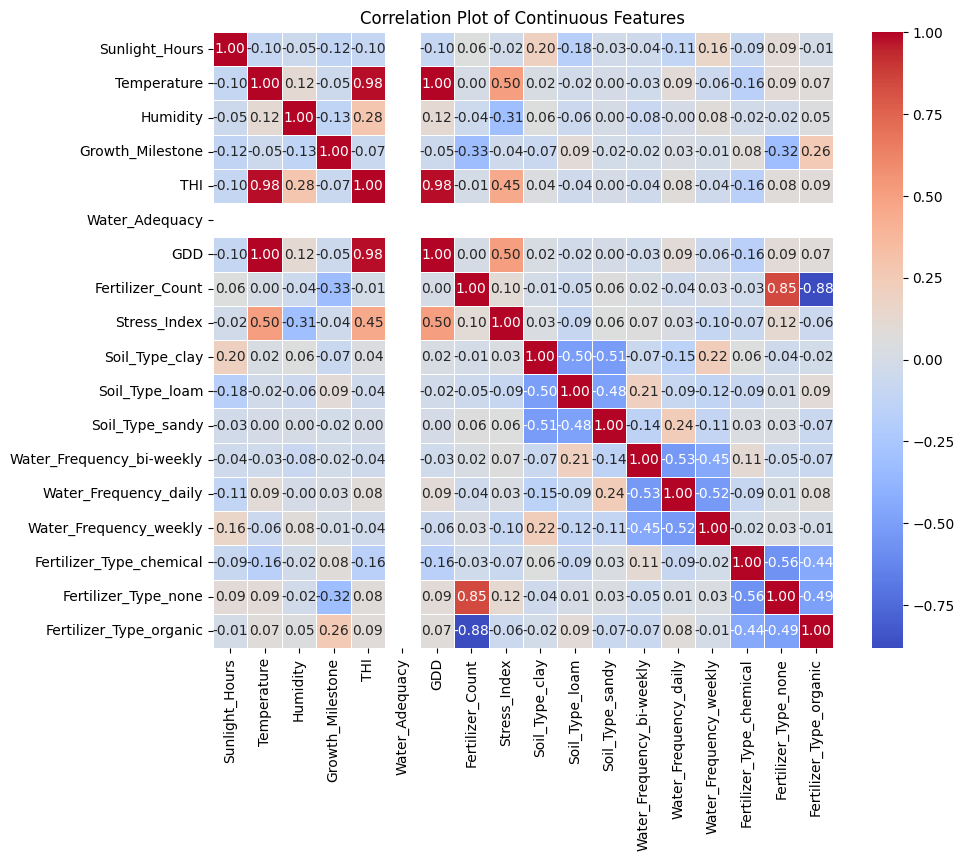

In [52]:
corr_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()

In [53]:
corr_matrix

Sunlight_Hours  Temperature  Humidity  \
Sunlight_Hours                   1.000000    -0.100628 -0.052482   
Temperature                     -0.100628     1.000000  0.117648   
Humidity                        -0.052482     0.117648  1.000000   
Growth_Milestone                -0.122212    -0.053577 -0.130328   
THI                             -0.098800     0.980721  0.283496   
Water_Adequacy                        NaN          NaN       NaN   
GDD                             -0.100628     1.000000  0.117648   
Fertilizer_Count                 0.055807     0.003533 -0.043991   
Stress_Index                    -0.023509     0.500589 -0.308911   
Soil_Type_clay                   0.204649     0.022744  0.058284   
Soil_Type_loam                  -0.180748    -0.023218 -0.062929   
Soil_Type_sandy                 -0.027667     0.000030  0.003479   
Water_Frequency_bi-weekly       -0.039835    -0.034083 -0.077827   
Water_Frequency_daily           -0.114460     0.090385 -0.002924   
Water_Frequency_weekly           0.160820    -0.061148  0.081276   
Fertilizer_Type_chemical        -0.085771    -0.163723 -0.023289   
Fertilizer_Type_none             0.092041     0.090451 -0.023958   
Fertilizer_Type_organic         -0.009391     0.074400  0.050469   

                           Growth_Milestone       THI  Water_Adequacy  \
Sunlight_Hours                    -0.122212 -0.098800             NaN   
Temperature                       -0.053577  0.980721             NaN   
Humidity                          -0.130328  0.283496             NaN   
Growth_Milestone                   1.000000 -0.069365             NaN   
THI                               -0.069365  1.000000             NaN   
Water_Adequacy                          NaN       NaN             NaN   
GDD                               -0.053577  0.980721             NaN   
Fertilizer_Count                  -0.329386 -0.011228             NaN   
Stress_Index                      -0.040820  0.451009             NaN   
Soil_Type_clay                    -0.072409  0.038438             NaN   
Soil_Type_loam                     0.092334 -0.039635             NaN   
Soil_Type_sandy                   -0.018362  0.000443             NaN   
Water_Frequency_bi-weekly         -0.018909 -0.041980             NaN   
Water_Frequency_daily              0.025399  0.076270             NaN   
Water_Frequency_weekly            -0.007809 -0.038318             NaN   
Fertilizer_Type_chemical           0.080436 -0.163412             NaN   
Fertilizer_Type_none              -0.315610  0.078069             NaN   
Fertilizer_Type_organic            0.257165  0.087486             NaN   

                                GDD  Fertilizer_Count  Stress_Index  \
Sunlight_Hours            -0.100628          0.055807     -0.023509   
Temperature                1.000000          0.003533      0.500589   
Humidity                   0.117648         -0.043991     -0.308911   
Growth_Milestone          -0.053577         -0.329386     -0.040820   
THI                        0.980721         -0.011228      0.451009   
Water_Adequacy                  NaN               NaN           NaN   
GDD                        1.000000          0.003533      0.500589   
Fertilizer_Count           0.003533          1.000000      0.100467   
Stress_Index               0.500589          0.100467      1.000000   
Soil_Type_clay             0.022744         -0.009459      0.034418   
Soil_Type_loam            -0.023218         -0.052570     -0.093081   
Soil_Type_sandy            0.000030          0.061706      0.057518   
Water_Frequency_bi-weekly -0.034083          0.017549      0.065336   
Water_Frequency_daily      0.090385         -0.040525      0.028024   
Water_Frequency_weekly    -0.061148          0.025139     -0.095217   
Fertilizer_Type_chemical  -0.163723         -0.033032     -0.067637   
Fertilizer_Type_none       0.090451          0.845285      0.119308   
Fertilizer_Type_organic    0.074400         -0.880786     -0.058018 

In [54]:
threshold = 0.7
features_to_drop = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            if colname not in features_to_drop:
                features_to_drop.append(colname)

In [55]:
features_to_drop

['THI', 'GDD', 'Fertilizer_Type_none', 'Fertilizer_Type_organic']

In [56]:
df_encoded = df_encoded.drop(['THI', 'GDD', 'Fertilizer_Type_none', 'Fertilizer_Type_organic'], axis = 1)

In [57]:
df_encoded.columns

Index(['Sunlight_Hours', 'Temperature', 'Humidity', 'Growth_Milestone',
       'Water_Adequacy', 'Fertilizer_Count', 'Stress_Index', 'Soil_Type_clay',
       'Soil_Type_loam', 'Soil_Type_sandy', 'Water_Frequency_bi-weekly',
       'Water_Frequency_daily', 'Water_Frequency_weekly',
       'Fertilizer_Type_chemical'],
      dtype='object')

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
X = df_encoded.drop(columns=['Growth_Milestone'])
y = df_encoded['Growth_Milestone']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [61]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
y_pred = classifier.predict(X_test)

In [63]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.50      0.51        20
           1       0.50      0.53      0.51        19

    accuracy                           0.51        39
   macro avg       0.51      0.51      0.51        39
weighted avg       0.51      0.51      0.51        39

Confusion Matrix:
[[10 10]
 [ 9 10]]


In [64]:
conf_matrix = confusion_matrix(y_test, y_pred)

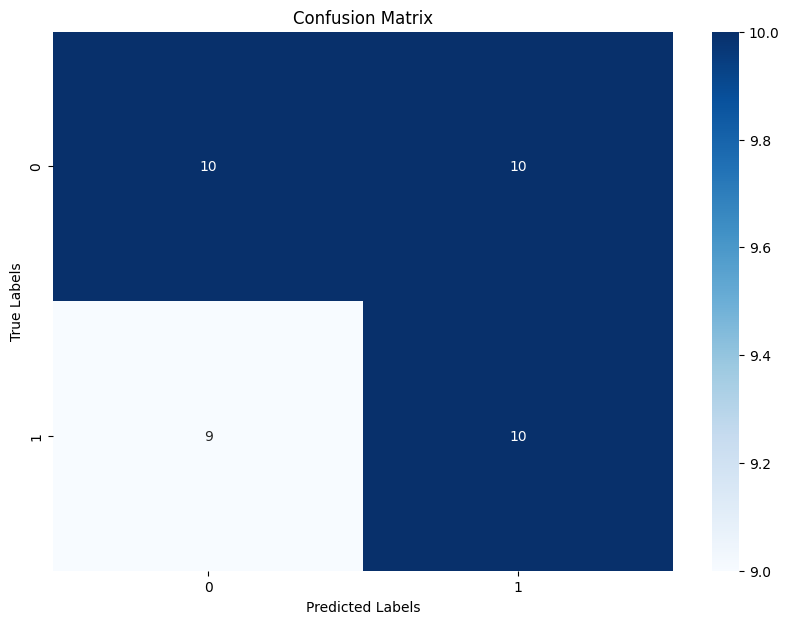

In [65]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [66]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [67]:
y_pred_dt = dt_classifier.predict(X_test)

In [68]:
print("Decision Tree Classifier")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Classifier
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.25      0.29        20
           1       0.40      0.53      0.45        19

    accuracy                           0.38        39
   macro avg       0.38      0.39      0.37        39
weighted avg       0.38      0.38      0.37        39

Confusion Matrix:
[[ 5 15]
 [ 9 10]]


In [71]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)

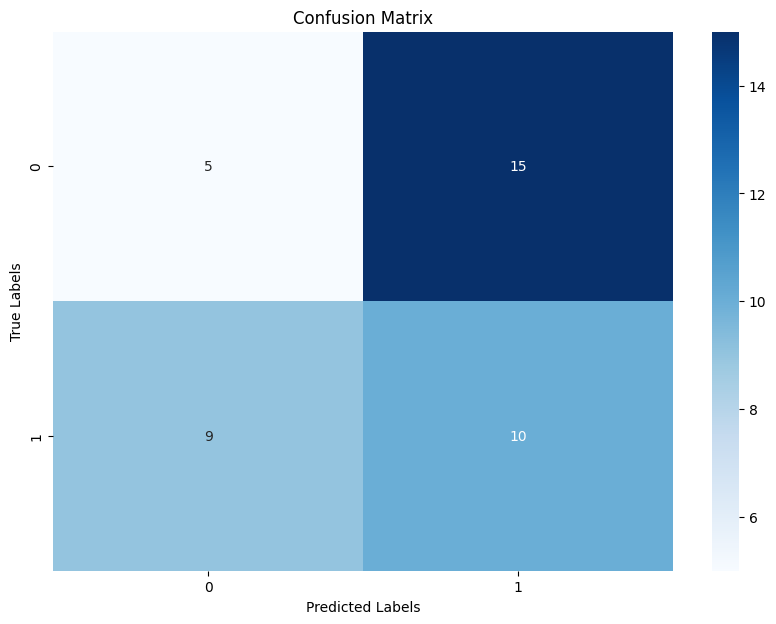

In [72]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

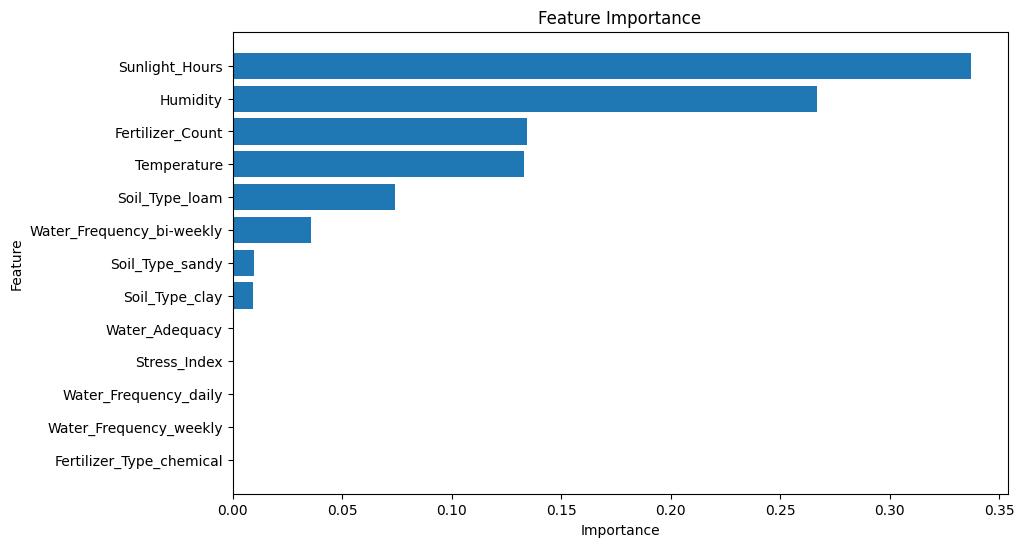

In [73]:
feature_importances = dt_classifier.feature_importances_

feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

In [74]:
log_reg_classifier = LogisticRegression(random_state=42)
log_reg_classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [75]:
y_pred_log_reg = log_reg_classifier.predict(X_test)

In [76]:
print("Logistic Regression")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        20
           1       0.47      0.47      0.47        19

    accuracy                           0.49        39
   macro avg       0.49      0.49      0.49        39
weighted avg       0.49      0.49      0.49        39

Confusion Matrix:
[[10 10]
 [10  9]]


In [77]:
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

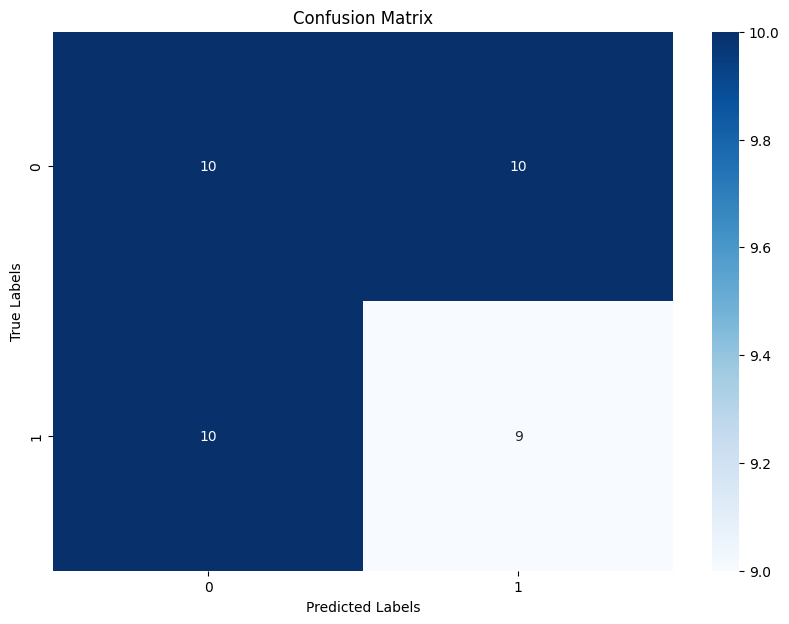

In [78]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [79]:
svc_classifier = SVC(random_state=42)
svc_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [80]:
y_pred_svc = svc_classifier.predict(X_test)

In [81]:
print("Support Vector Classifier")
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))

Support Vector Classifier
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.65      0.62        20
           1       0.59      0.53      0.56        19

    accuracy                           0.59        39
   macro avg       0.59      0.59      0.59        39
weighted avg       0.59      0.59      0.59        39

Confusion Matrix:
[[13  7]
 [ 9 10]]


In [82]:
conf_matrix = confusion_matrix(y_test, y_pred_svc)

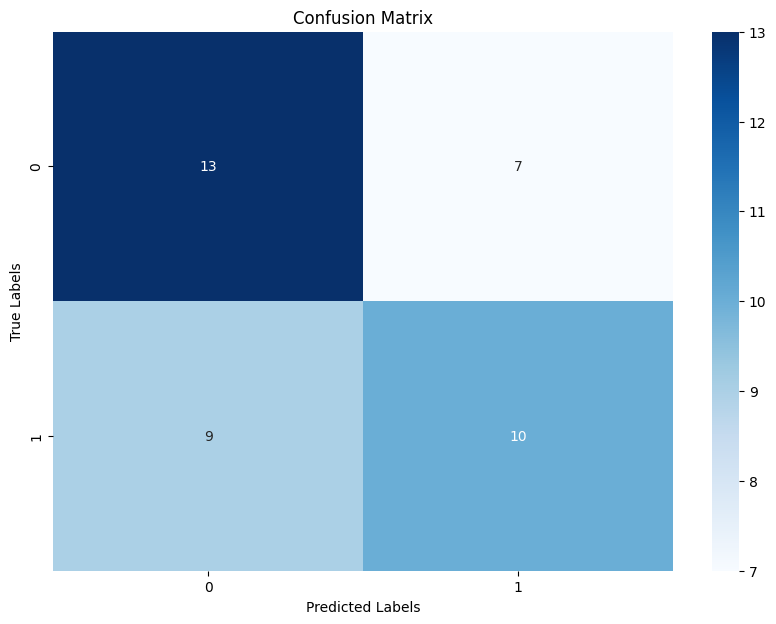

In [83]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [84]:
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [85]:
y_pred_xgb = xgb_classifier.predict(X_test)

In [86]:
print("XGBoost Classifier")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

XGBoost Classifier
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.40      0.44        20
           1       0.48      0.58      0.52        19

    accuracy                           0.49        39
   macro avg       0.49      0.49      0.48        39
weighted avg       0.49      0.49      0.48        39

Confusion Matrix:
[[ 8 12]
 [ 8 11]]


In [87]:
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

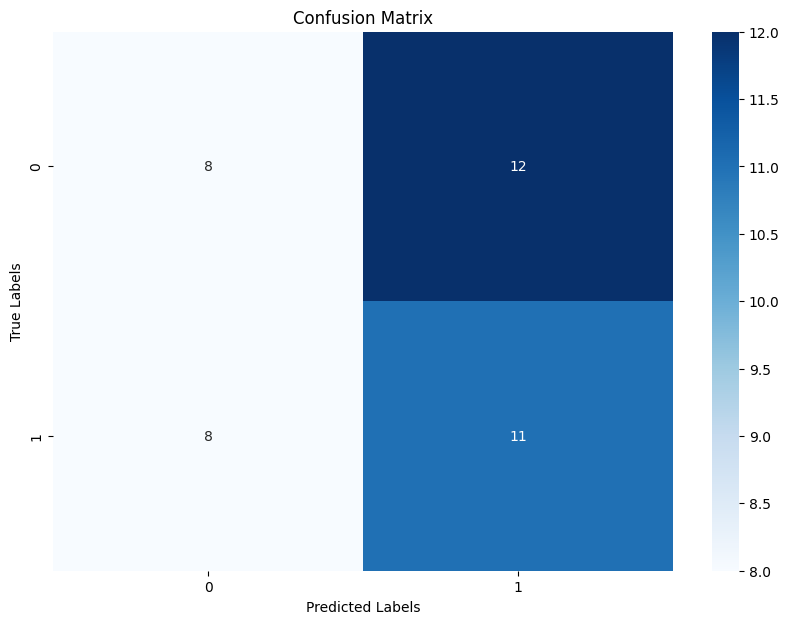

In [88]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [89]:
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Classifier (SVC)': SVC(random_state=42),
    'XGBoost Classifier': XGBClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42)
}

In [90]:
from sklearn.metrics import accuracy_score

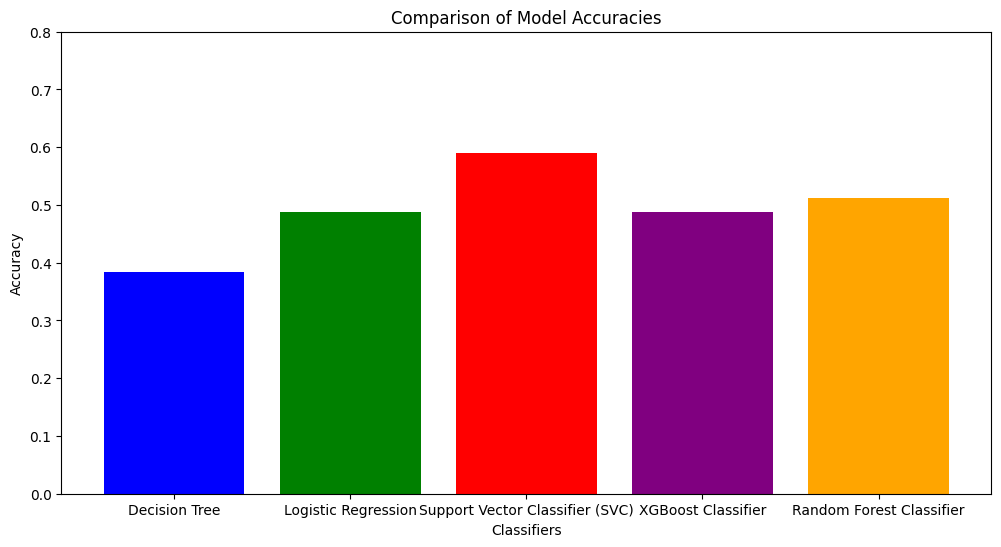

In [93]:
results = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

plt.figure(figsize=(12, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 0.8)
plt.show()

In [94]:
from keras.models import Sequential
from keras.layers import Dense

In [95]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [96]:
X_train = X_train.astype(int)

In [114]:
ann_model = Sequential()
ann_model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
ann_model.add(Dense(256, activation='relu'))
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

In [115]:
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
ann_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 512)               7168      
                                                                 
 dense_24 (Dense)            (None, 256)               131328    
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 1)                 33        
                                                                 
Total params: 181761 (710.00 KB)
Trainable params: 181

In [116]:
history = ann_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
4/4 [==============================] - 2s 99ms/step - loss: 1.1968 - accuracy: 0.5772 - val_loss: 0.7792 - val_accuracy: 0.6129
Epoch 2/20
4/4 [==============================] - 0s 57ms/step - loss: 0.8462 - accuracy: 0.4390 - val_loss: 0.8145 - val_accuracy: 0.3871
Epoch 3/20
4/4 [==============================] - 0s 25ms/step - loss: 0.6880 - accuracy: 0.5366 - val_loss: 0.6866 - val_accuracy: 0.5806
Epoch 4/20
4/4 [==============================] - 0s 62ms/step - loss: 0.6954 - accuracy: 0.5528 - val_loss: 0.8182 - val_accuracy: 0.3871
Epoch 5/20
4/4 [==============================] - 0s 48ms/step - loss: 0.7372 - accuracy: 0.5285 - val_loss: 0.7141 - val_accuracy: 0.4194
Epoch 6/20
4/4 [==============================] - 0s 83ms/step - loss: 0.7224 - accuracy: 0.5285 - val_loss: 0.7114 - val_accuracy: 0.4194
Epoch 7/20
4/4 [==============================] - 0s 87ms/step - loss: 0.6825 - accuracy: 0.5528 - val_loss: 0.8012 - val_accuracy: 0.3871
Epoch 8/20
4/4 [===========

In [117]:
X_test = X_test.astype(int)

In [118]:
y_pred_probs = ann_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

2/2 [==============================] - 0s 9ms/step


In [119]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [120]:
conf_matrix

array([[20,  0],
       [19,  0]], dtype=int64)

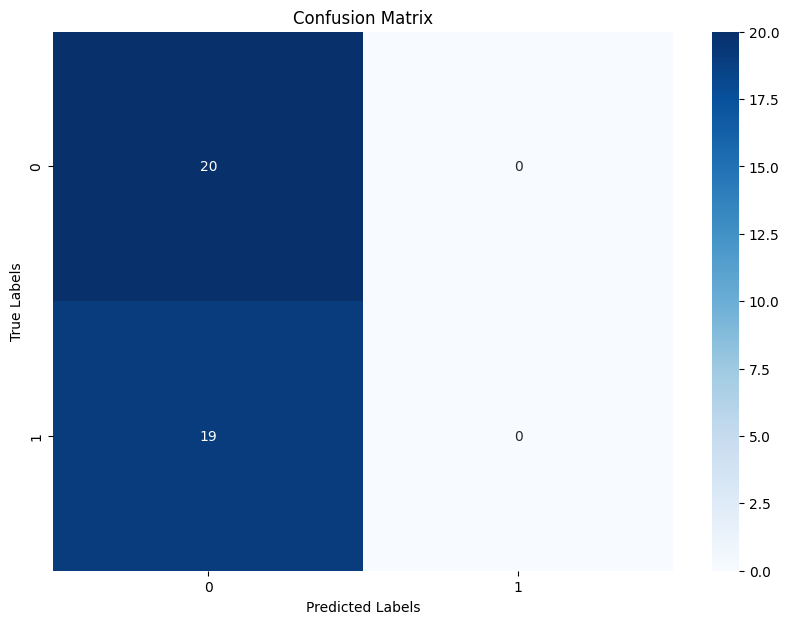

In [122]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [123]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.51
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68        20
           1       0.00      0.00      0.00        19

    accuracy                           0.51        39
   macro avg       0.26      0.50      0.34        39
weighted avg       0.26      0.51      0.35        39



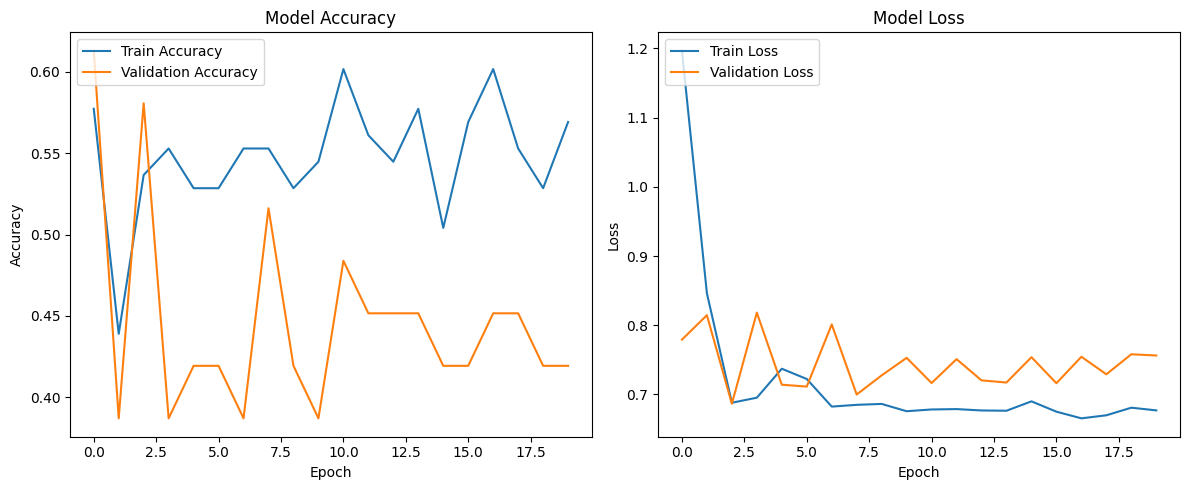

In [124]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [125]:
from sklearn.model_selection import GridSearchCV

In [128]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Classifier (SVC)': SVC(random_state=42),
    'XGBoost Classifier': XGBClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42)
}

In [126]:
param_grids = {
    'Decision Tree': {
        'max_depth': [3, 5, 7, None],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear']
    },
    'Support Vector Classifier (SVC)': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto']
    },
    'XGBoost Classifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Random Forest Classifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
}

In [129]:
best_estimators = {}
for model_name, model in models.items():
    print(f"Performing GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], 
                               scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best params for {model_name}: {grid_search.best_params_}")
    print(f"Best score for {model_name}: {grid_search.best_score_}")
    print()

Performing GridSearchCV for Decision Tree...
Best params for Decision Tree: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 5}
Best score for Decision Tree: 0.6094623655913979

Performing GridSearchCV for Logistic Regression...
Best params for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
Best score for Logistic Regression: 0.6427956989247312

Performing GridSearchCV for Support Vector Classifier (SVC)...
Best params for Support Vector Classifier (SVC): {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Best score for Support Vector Classifier (SVC): 0.6556989247311829

Performing GridSearchCV for XGBoost Classifier...
Best params for XGBoost Classifier: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score for XGBoost Classifier: 0.6301075268817204

Performing GridSearchCV for Random Forest Classifier...
Best params for Random Forest Classifier: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Best score for Random Forest Classifier: 0.635913

In [130]:
for model_name, best_model in best_estimators.items():
    test_score = best_model.score(X_test, y_test)
    print(f"Test accuracy for {model_name}: {test_score}")

Test accuracy for Decision Tree: 0.46153846153846156
Test accuracy for Logistic Regression: 0.5384615384615384
Test accuracy for Support Vector Classifier (SVC): 0.6410256410256411
Test accuracy for XGBoost Classifier: 0.5897435897435898
Test accuracy for Random Forest Classifier: 0.5641025641025641


In [ ]:
log_reg_classifier = LogisticRegression(C= 1, 'solver'= 'lbfgs', random_state=42)
log_reg_classifier.fit(X_train, y_train)

In [ ]:
import pickle

with open('logistic_regression_model_health.pkl', 'wb') as file:
    pickle.dump(lr_model, file)